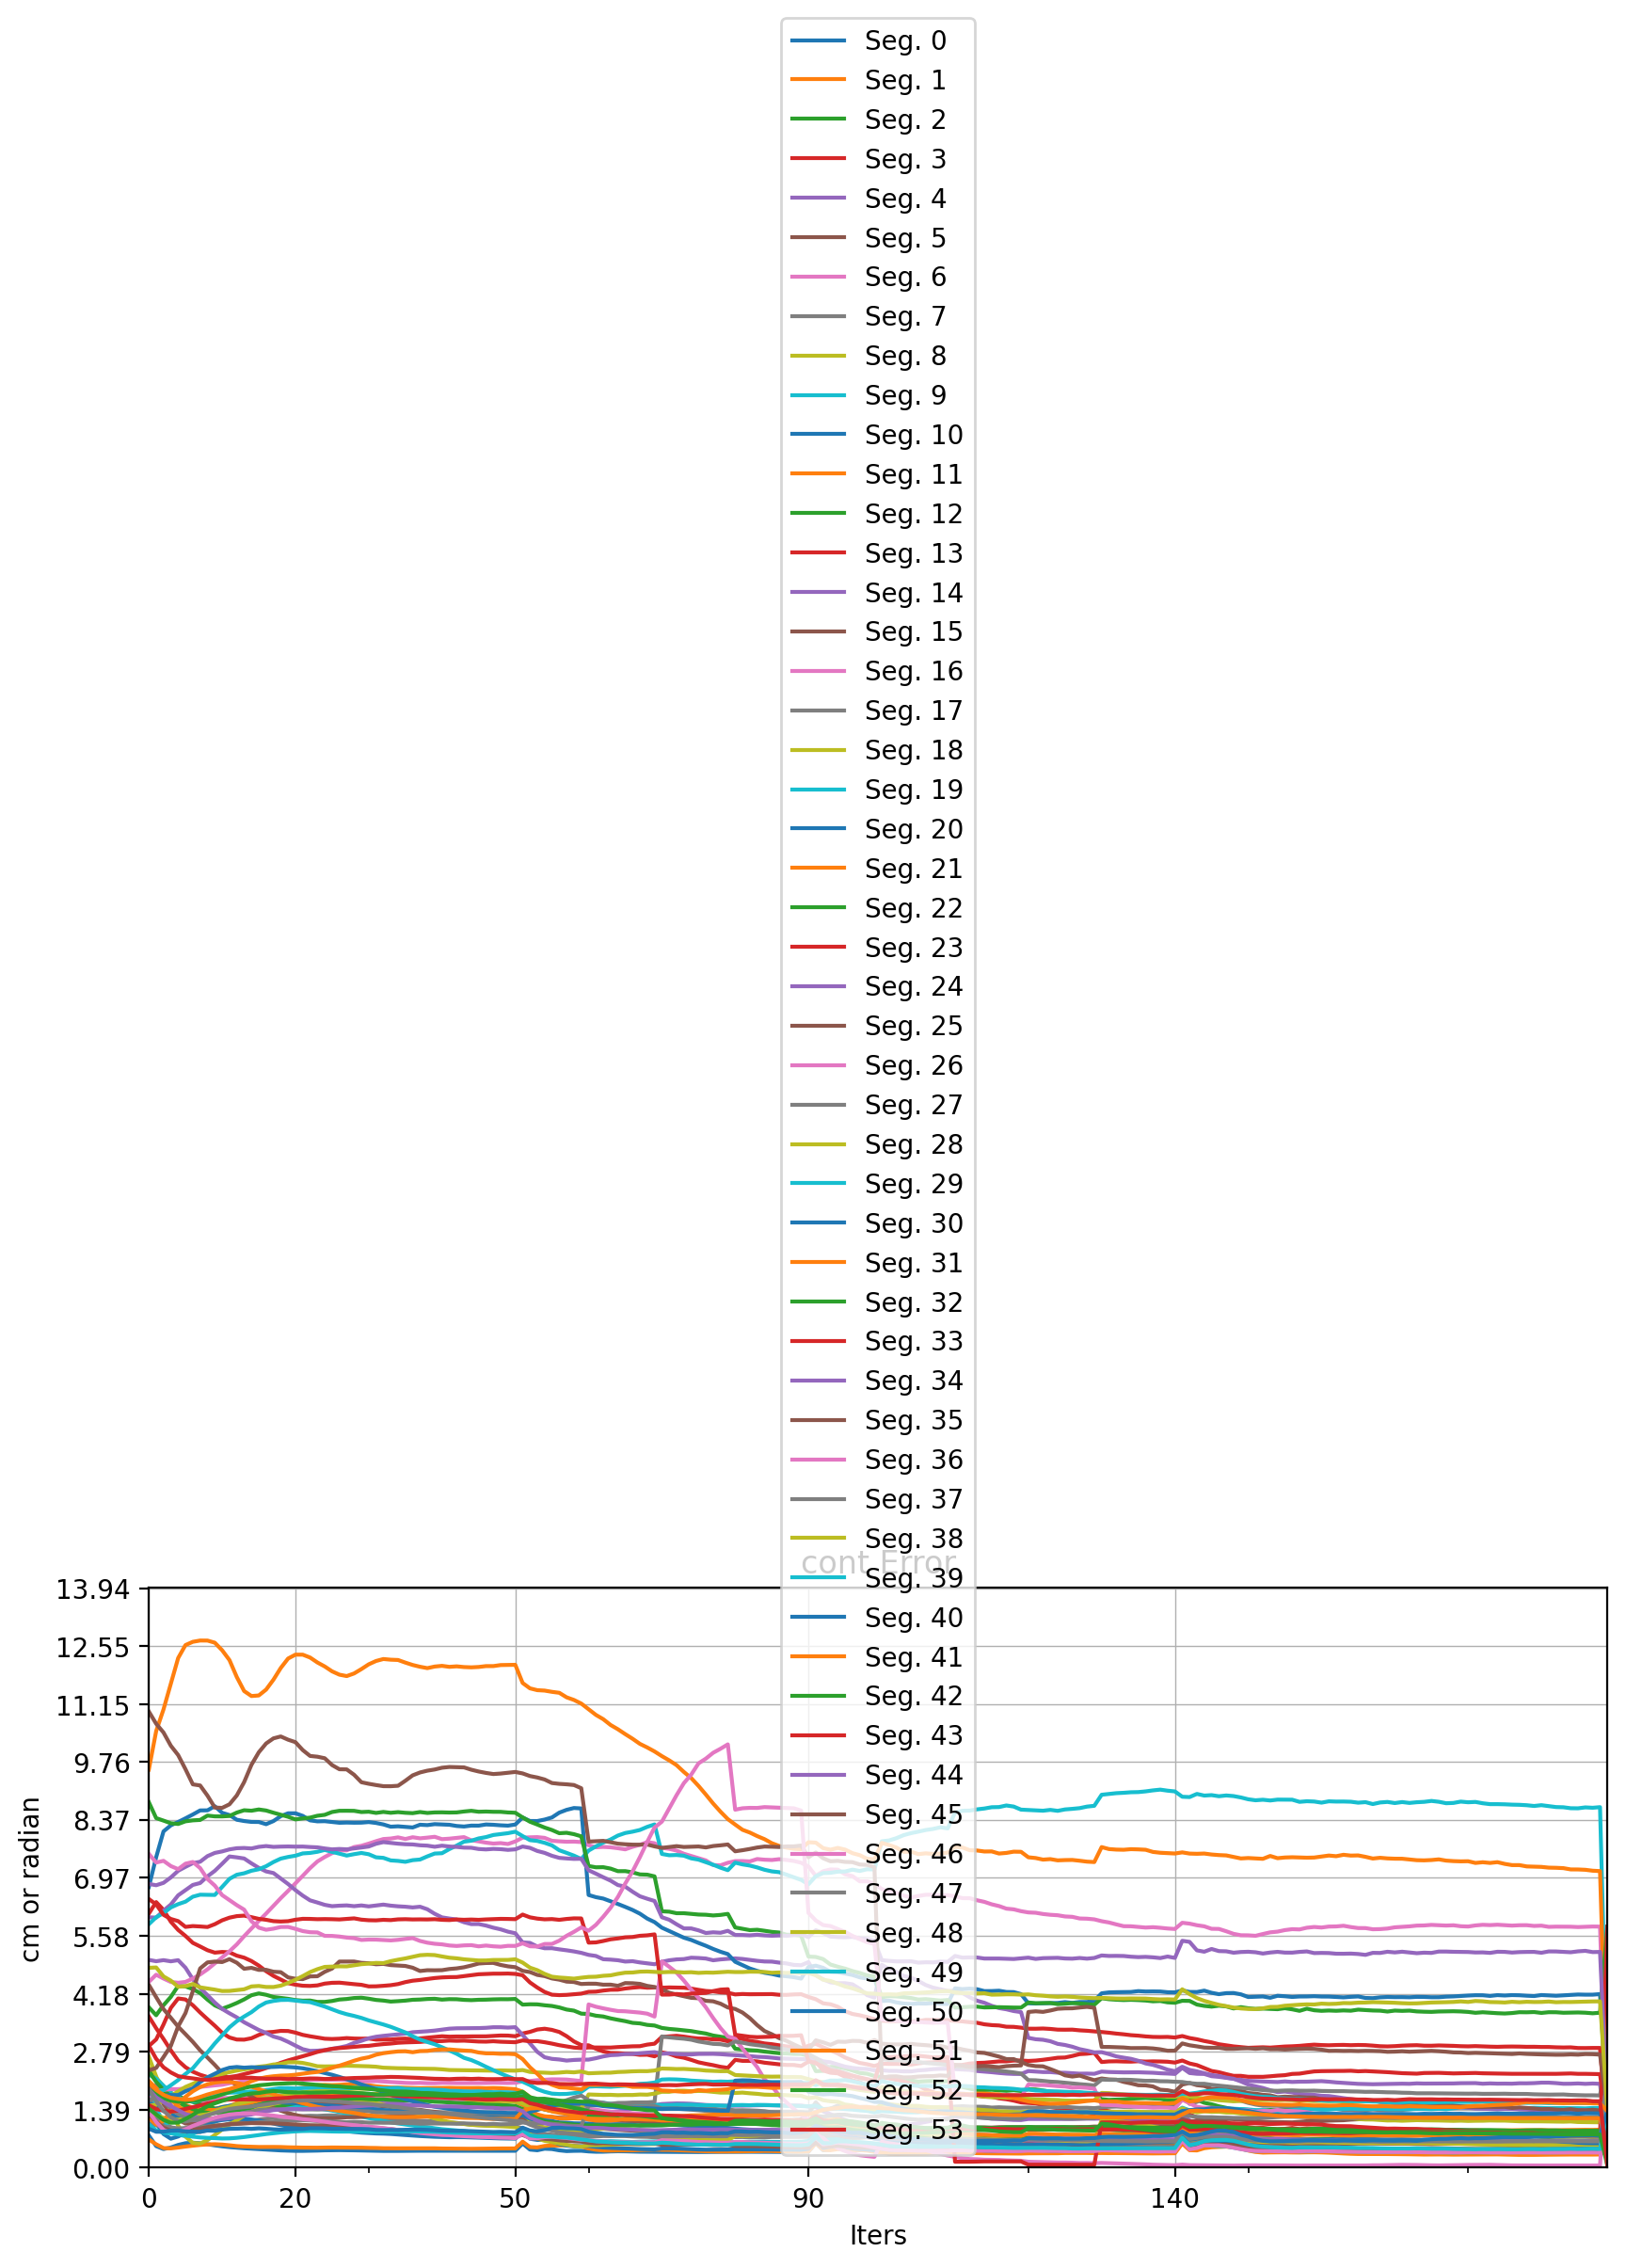

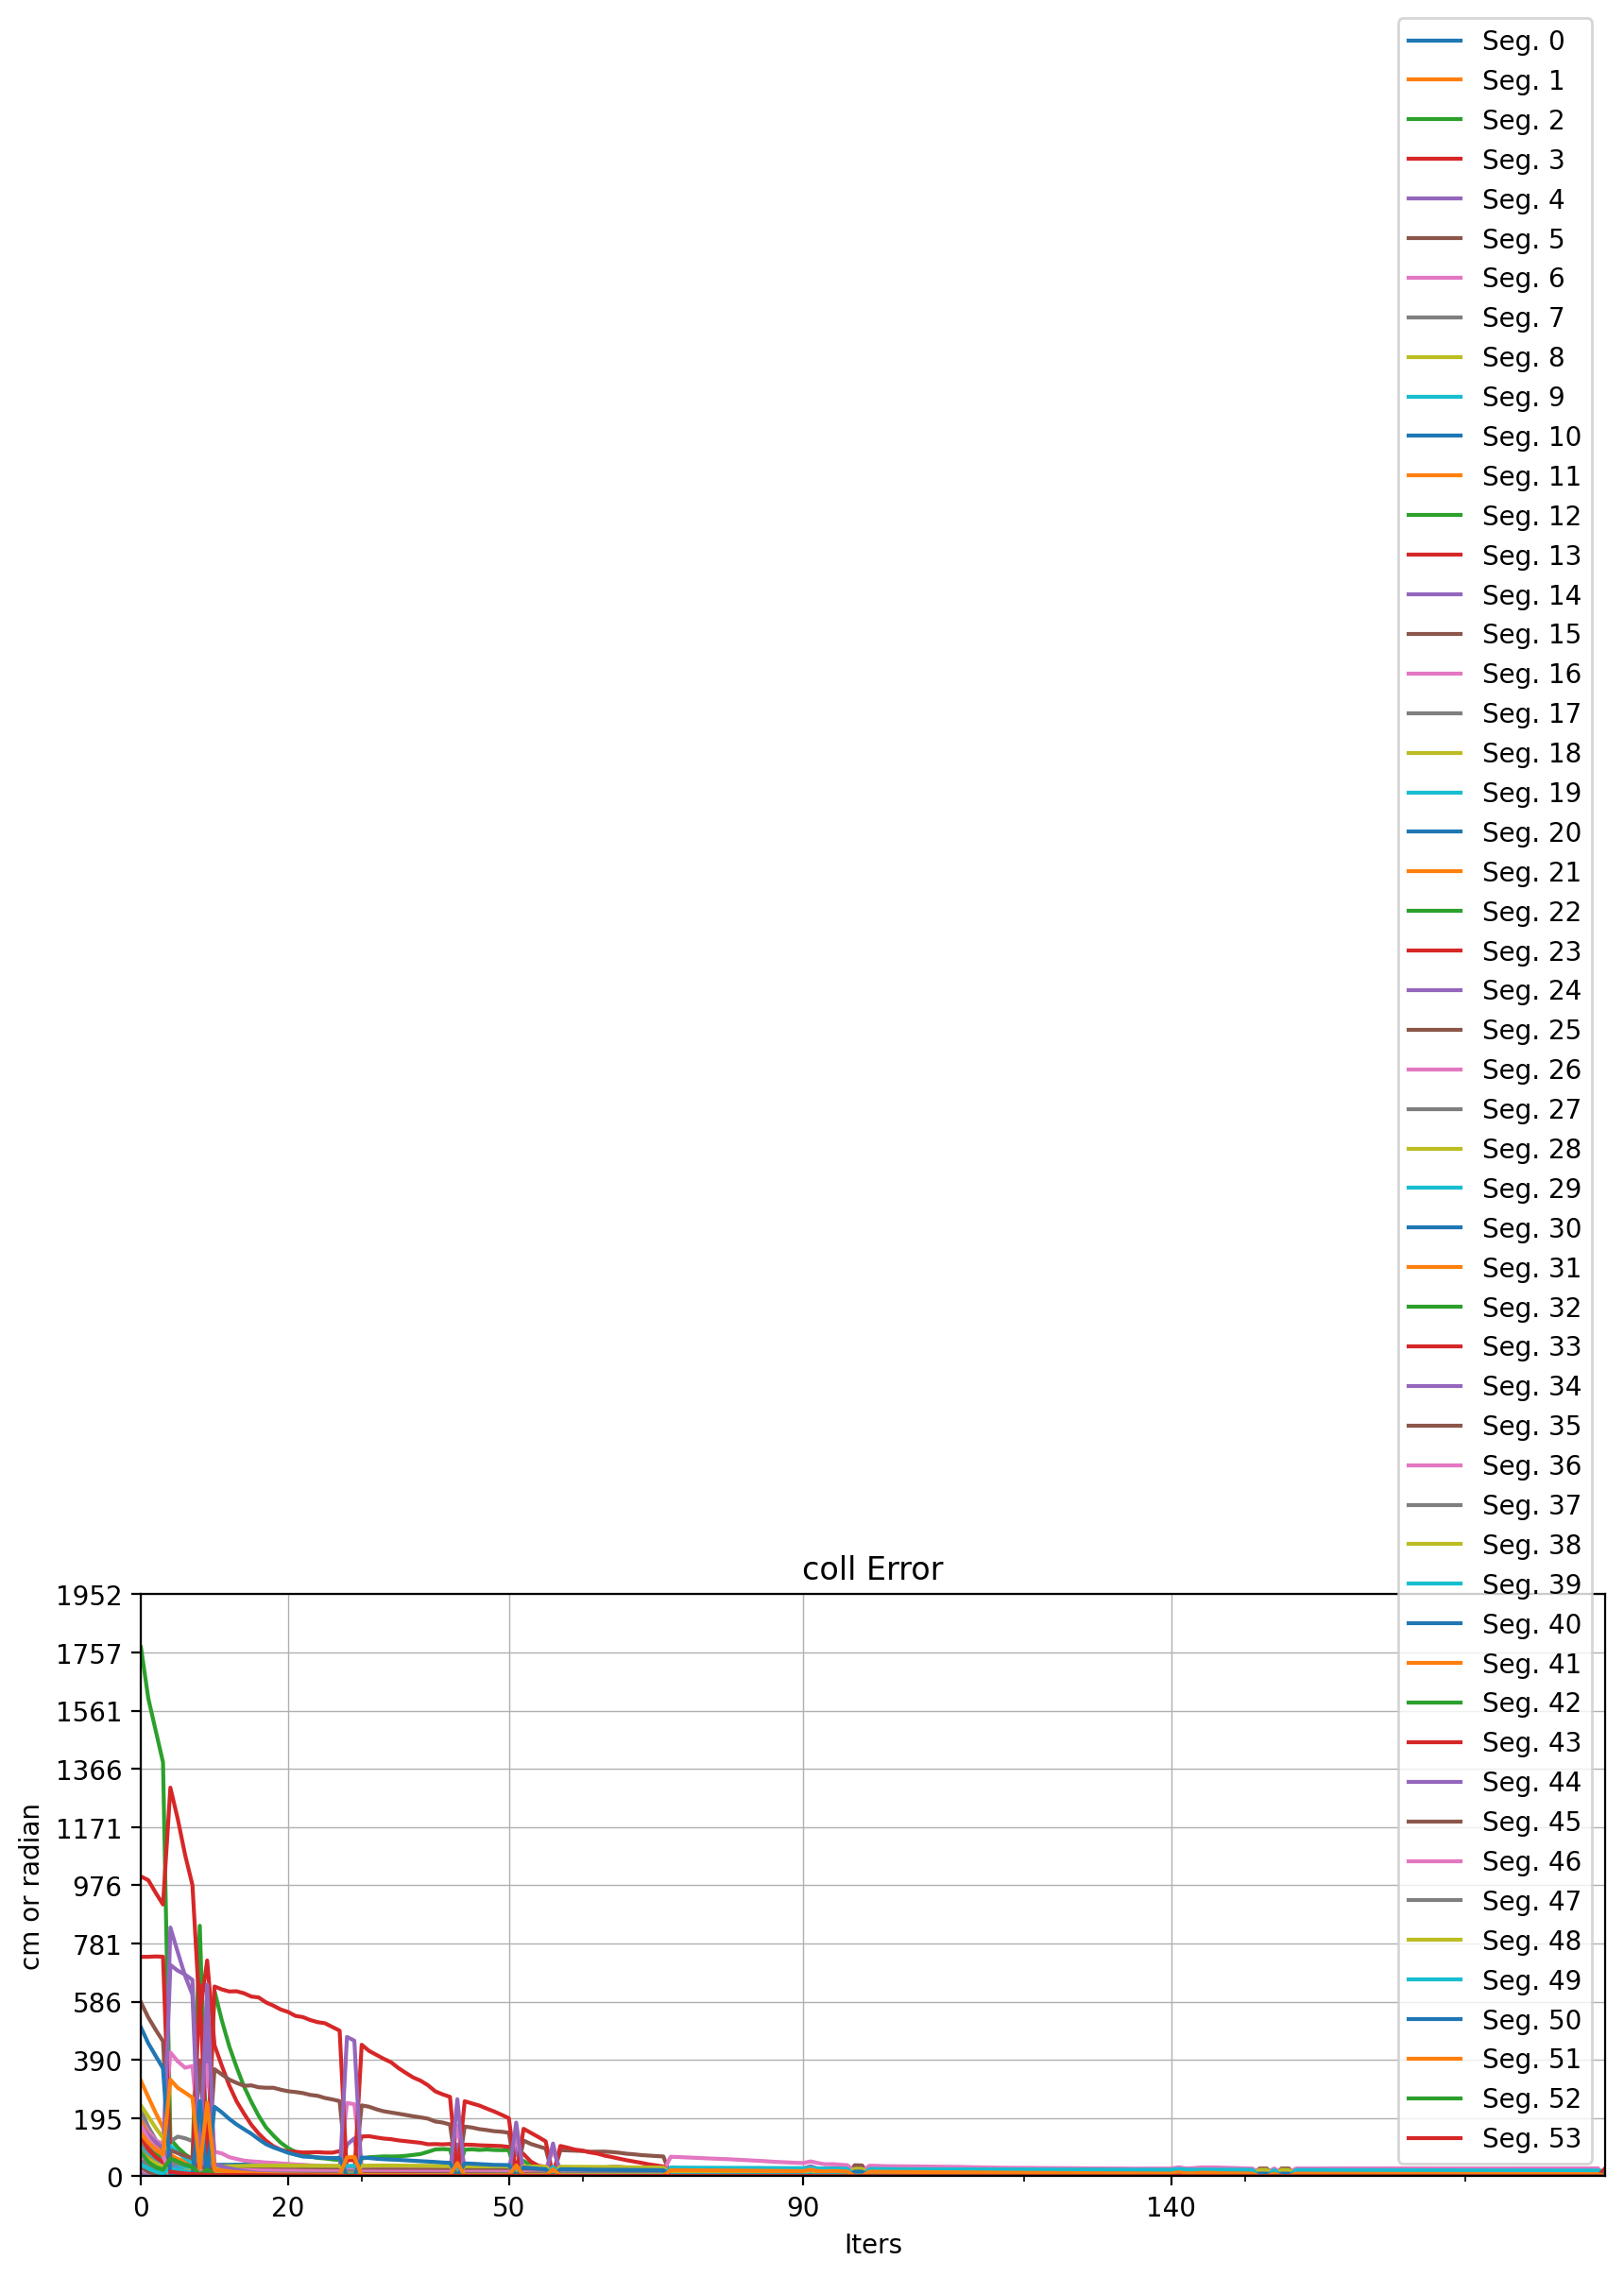

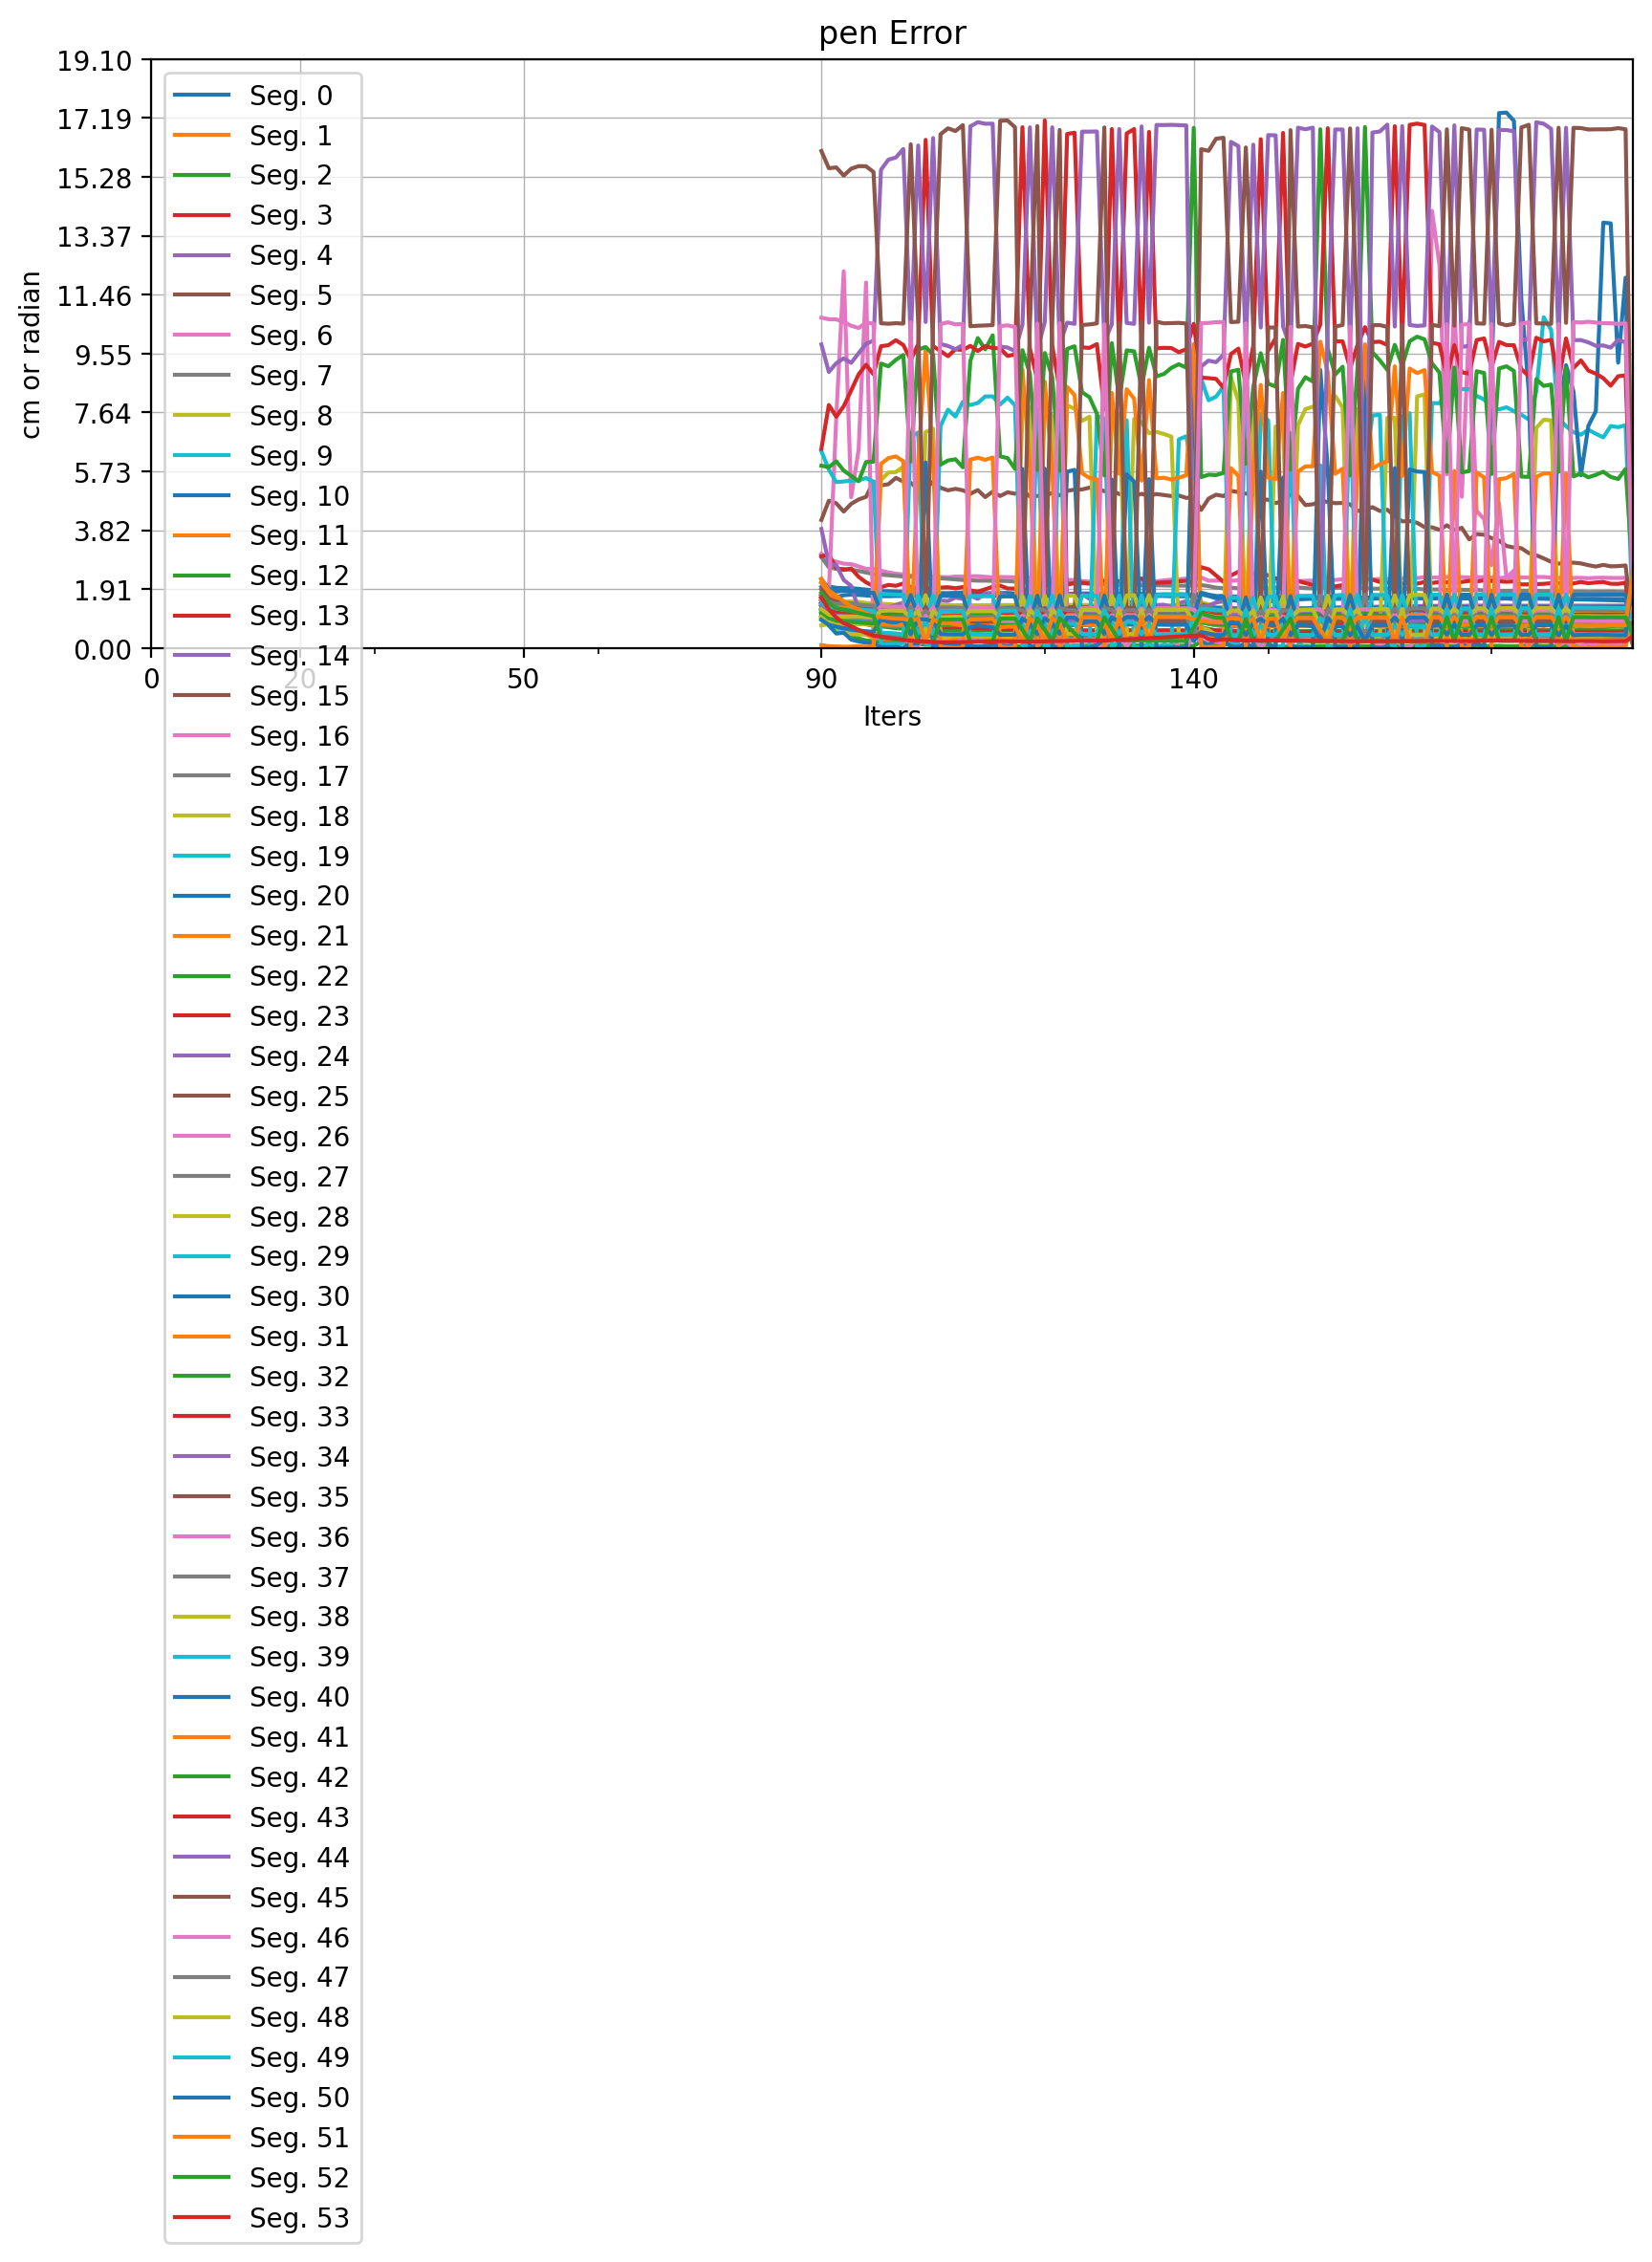

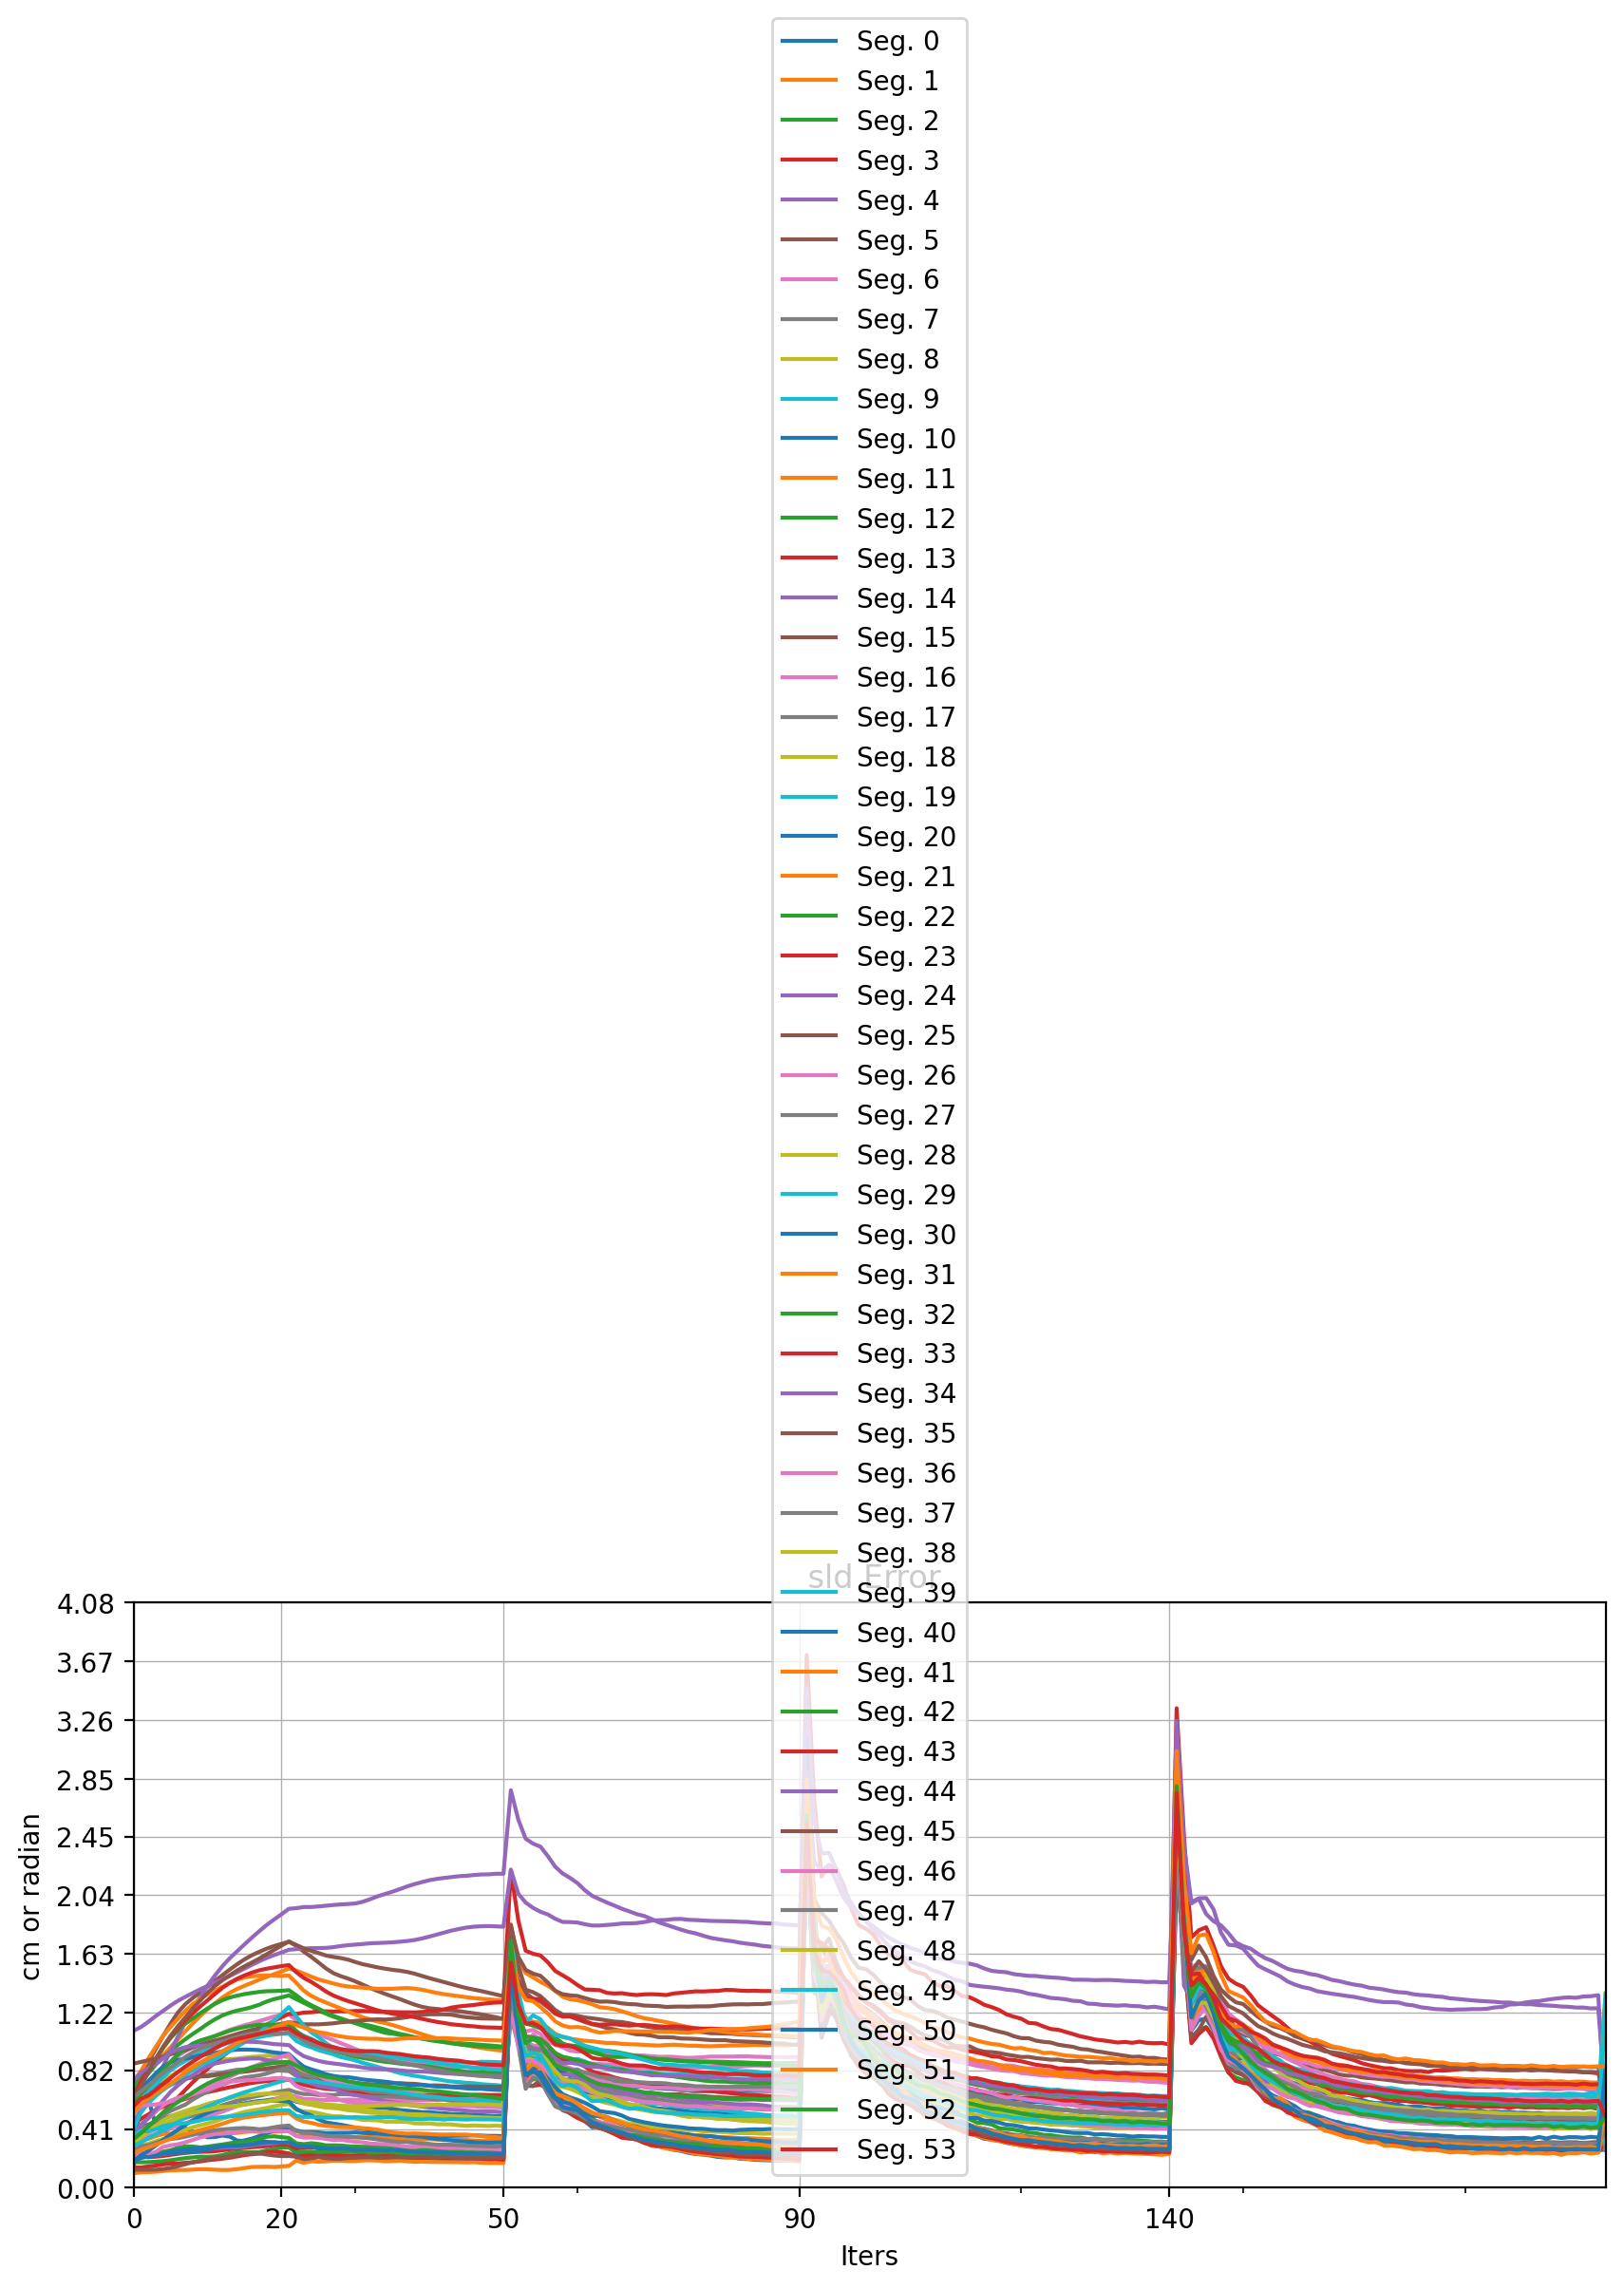

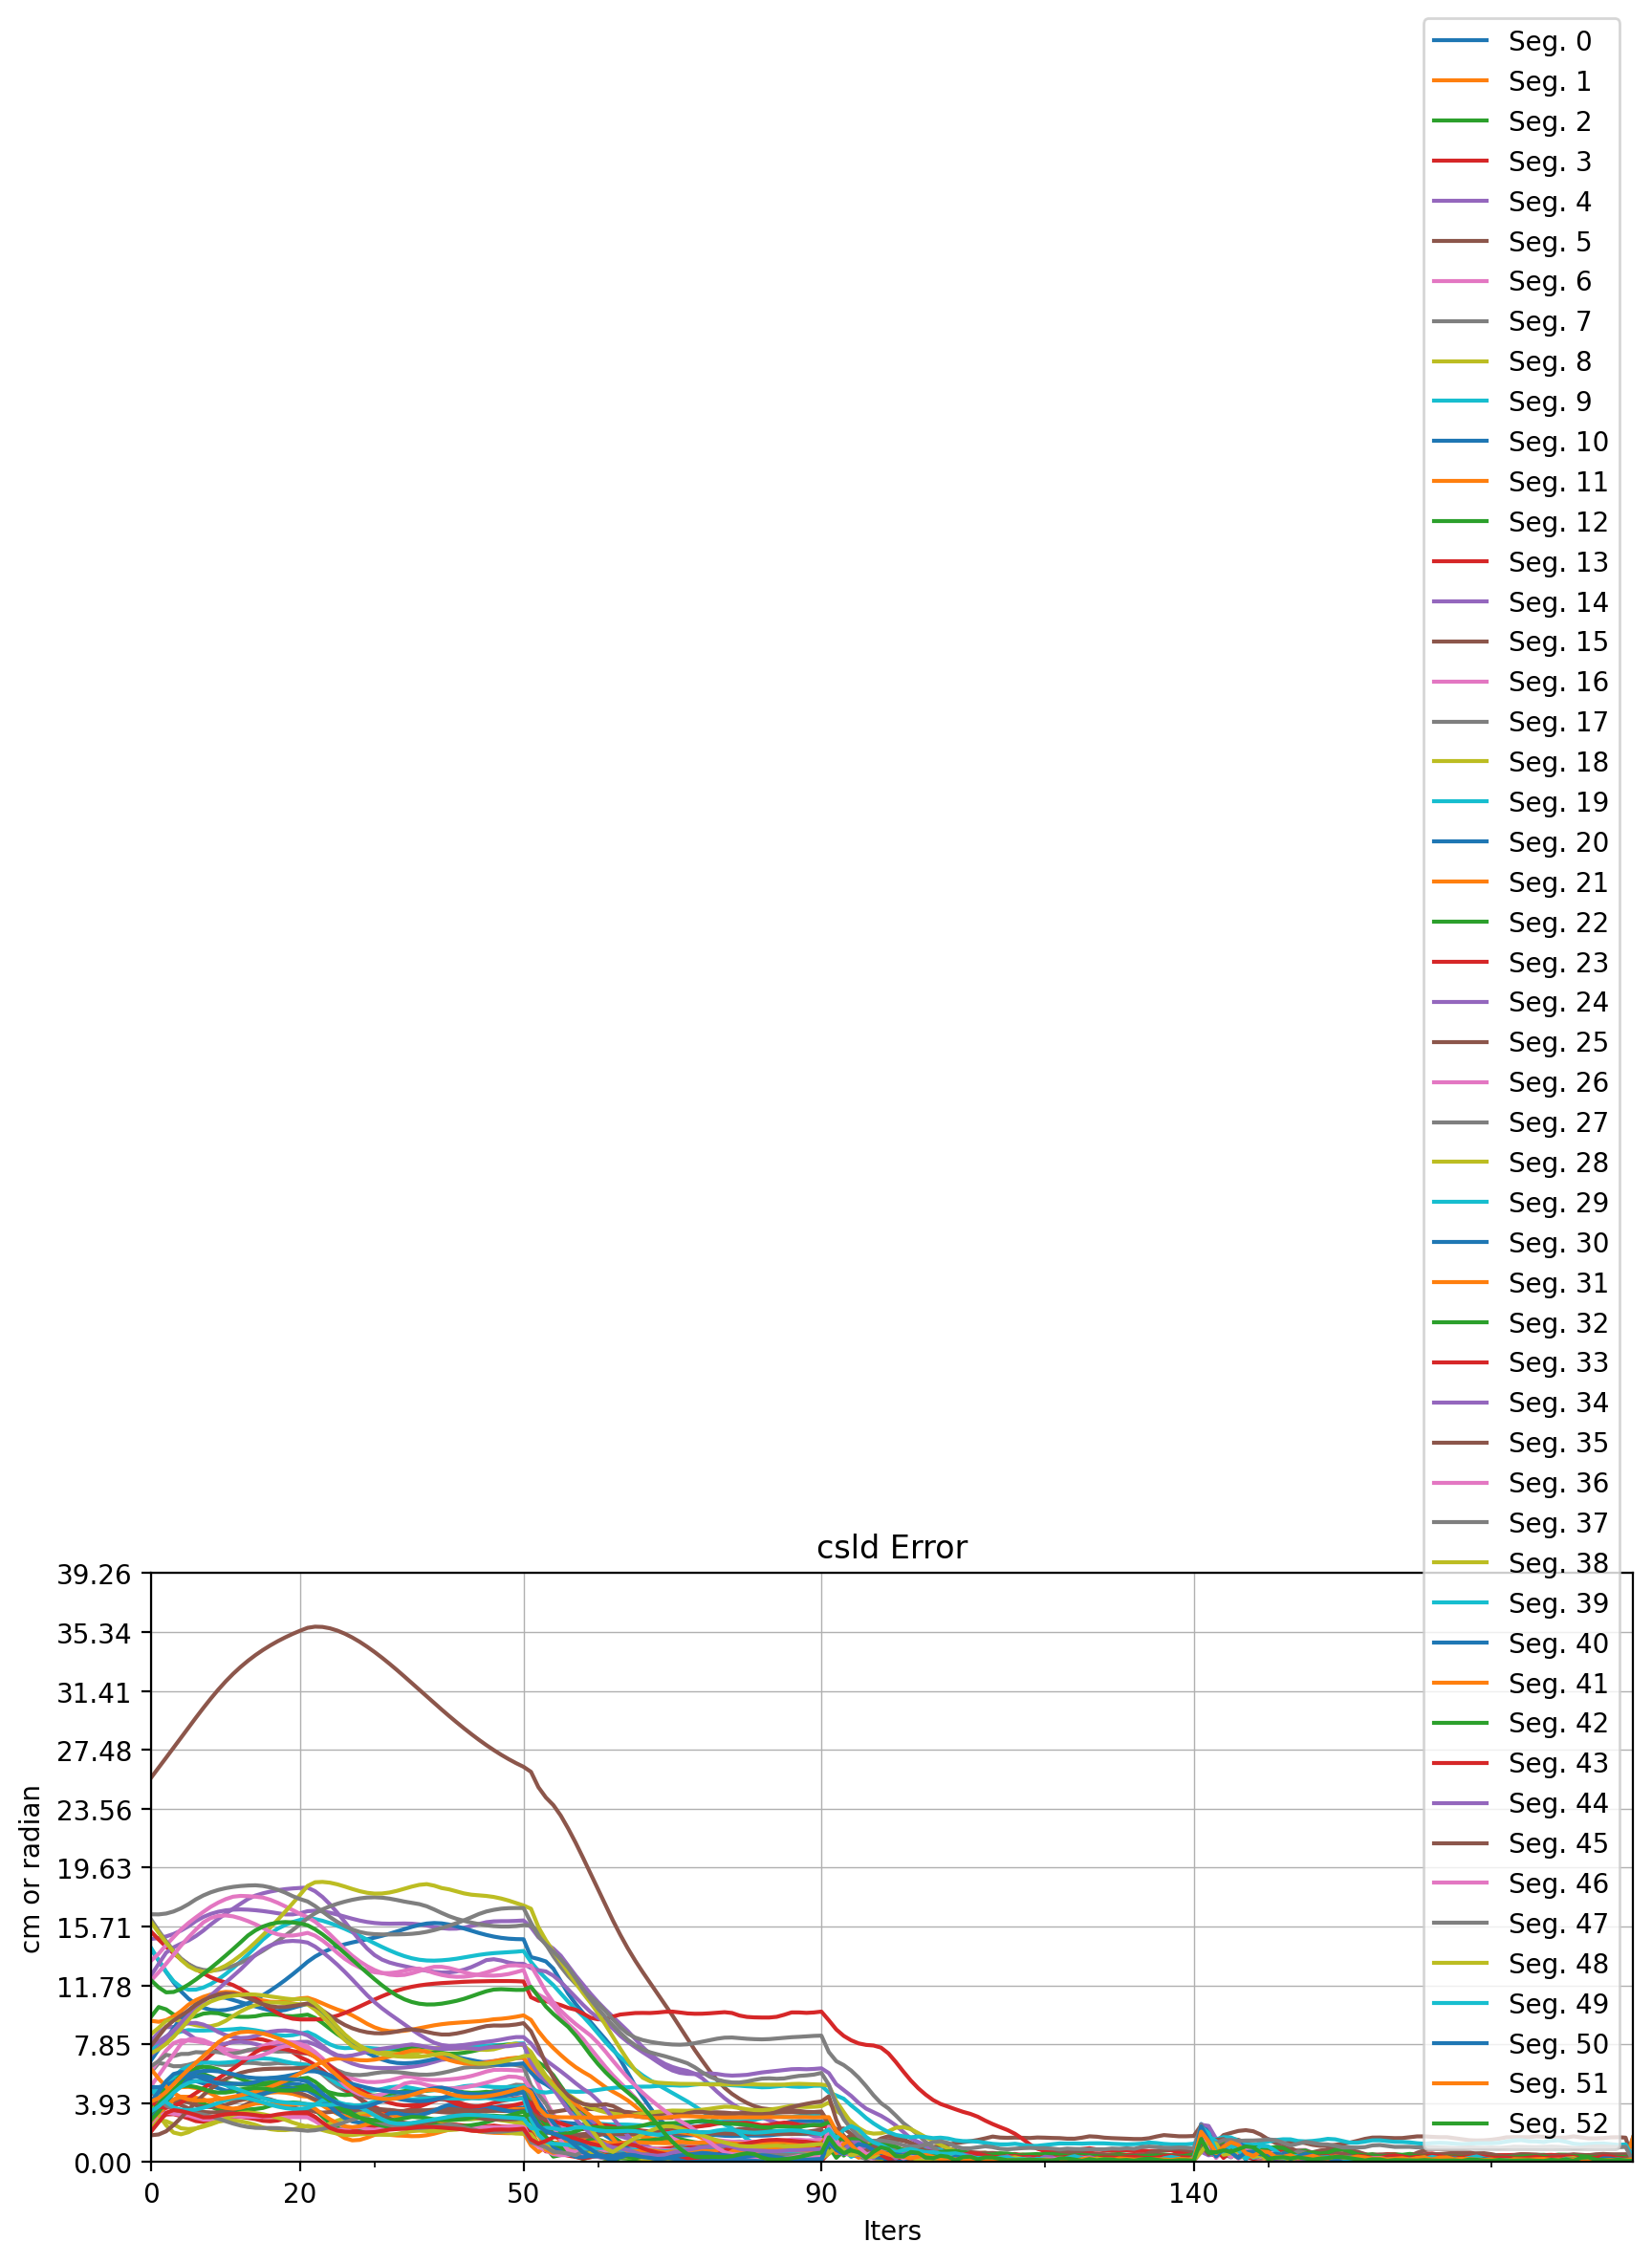

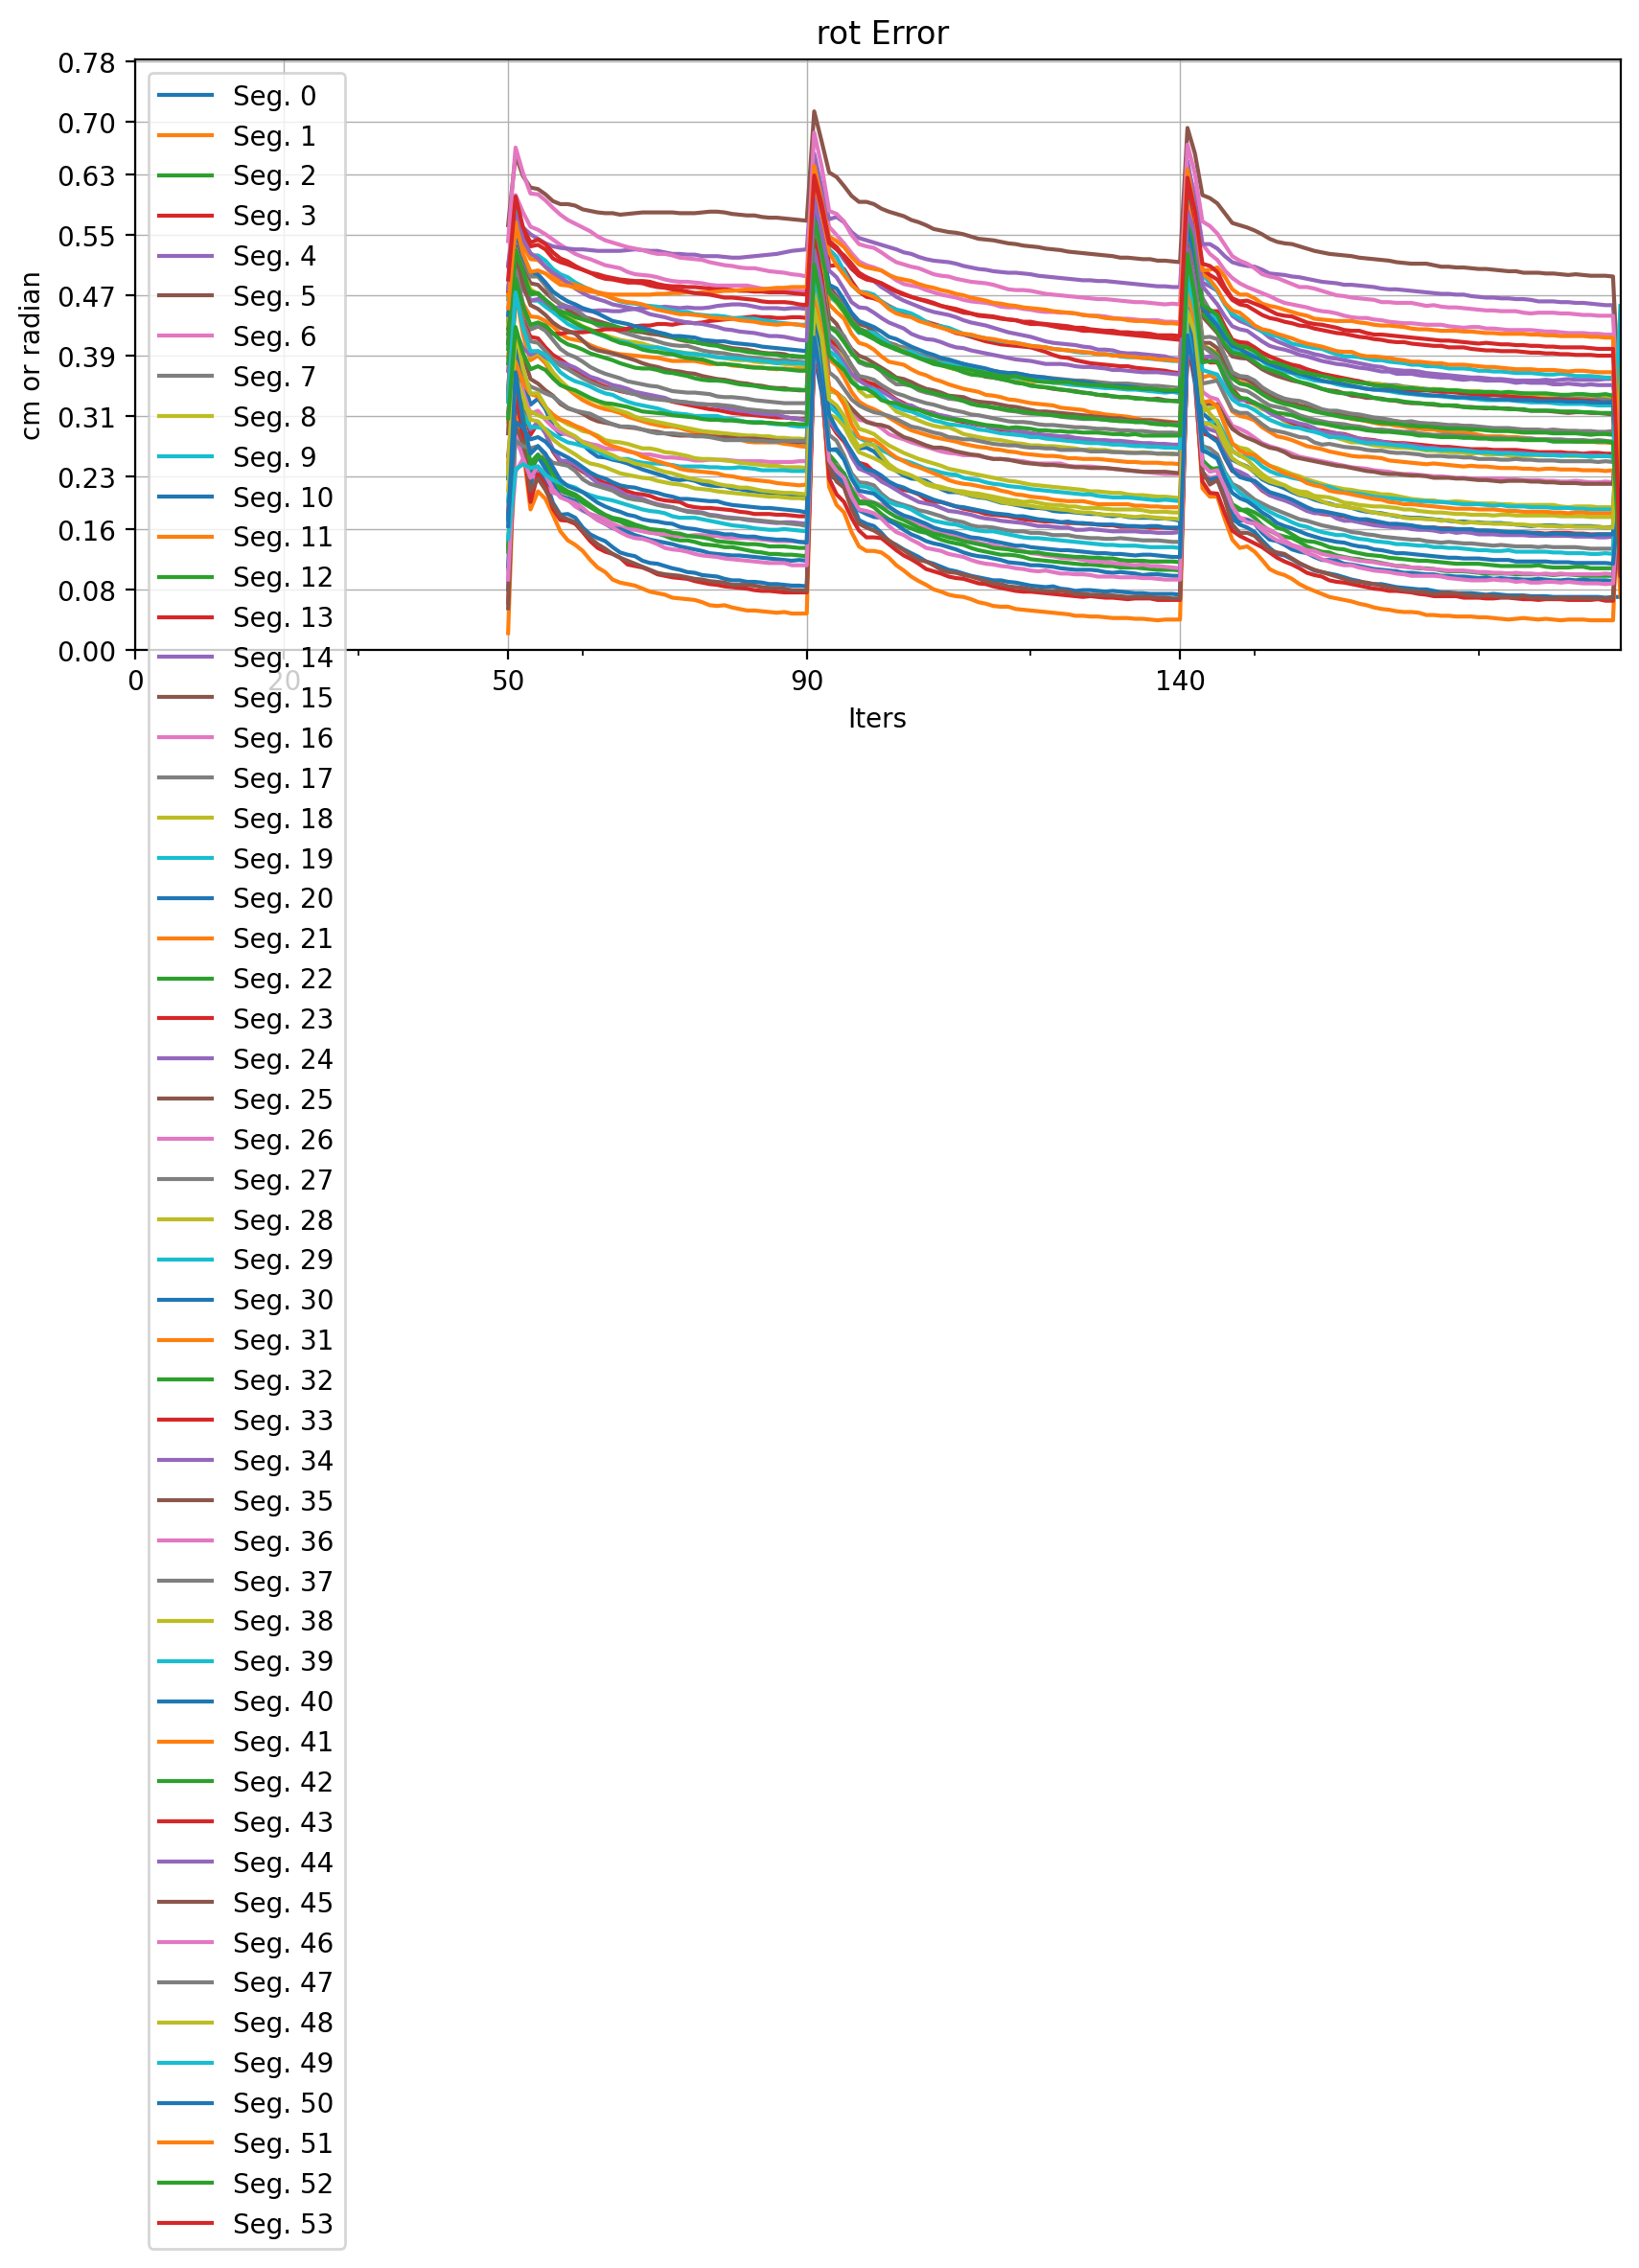

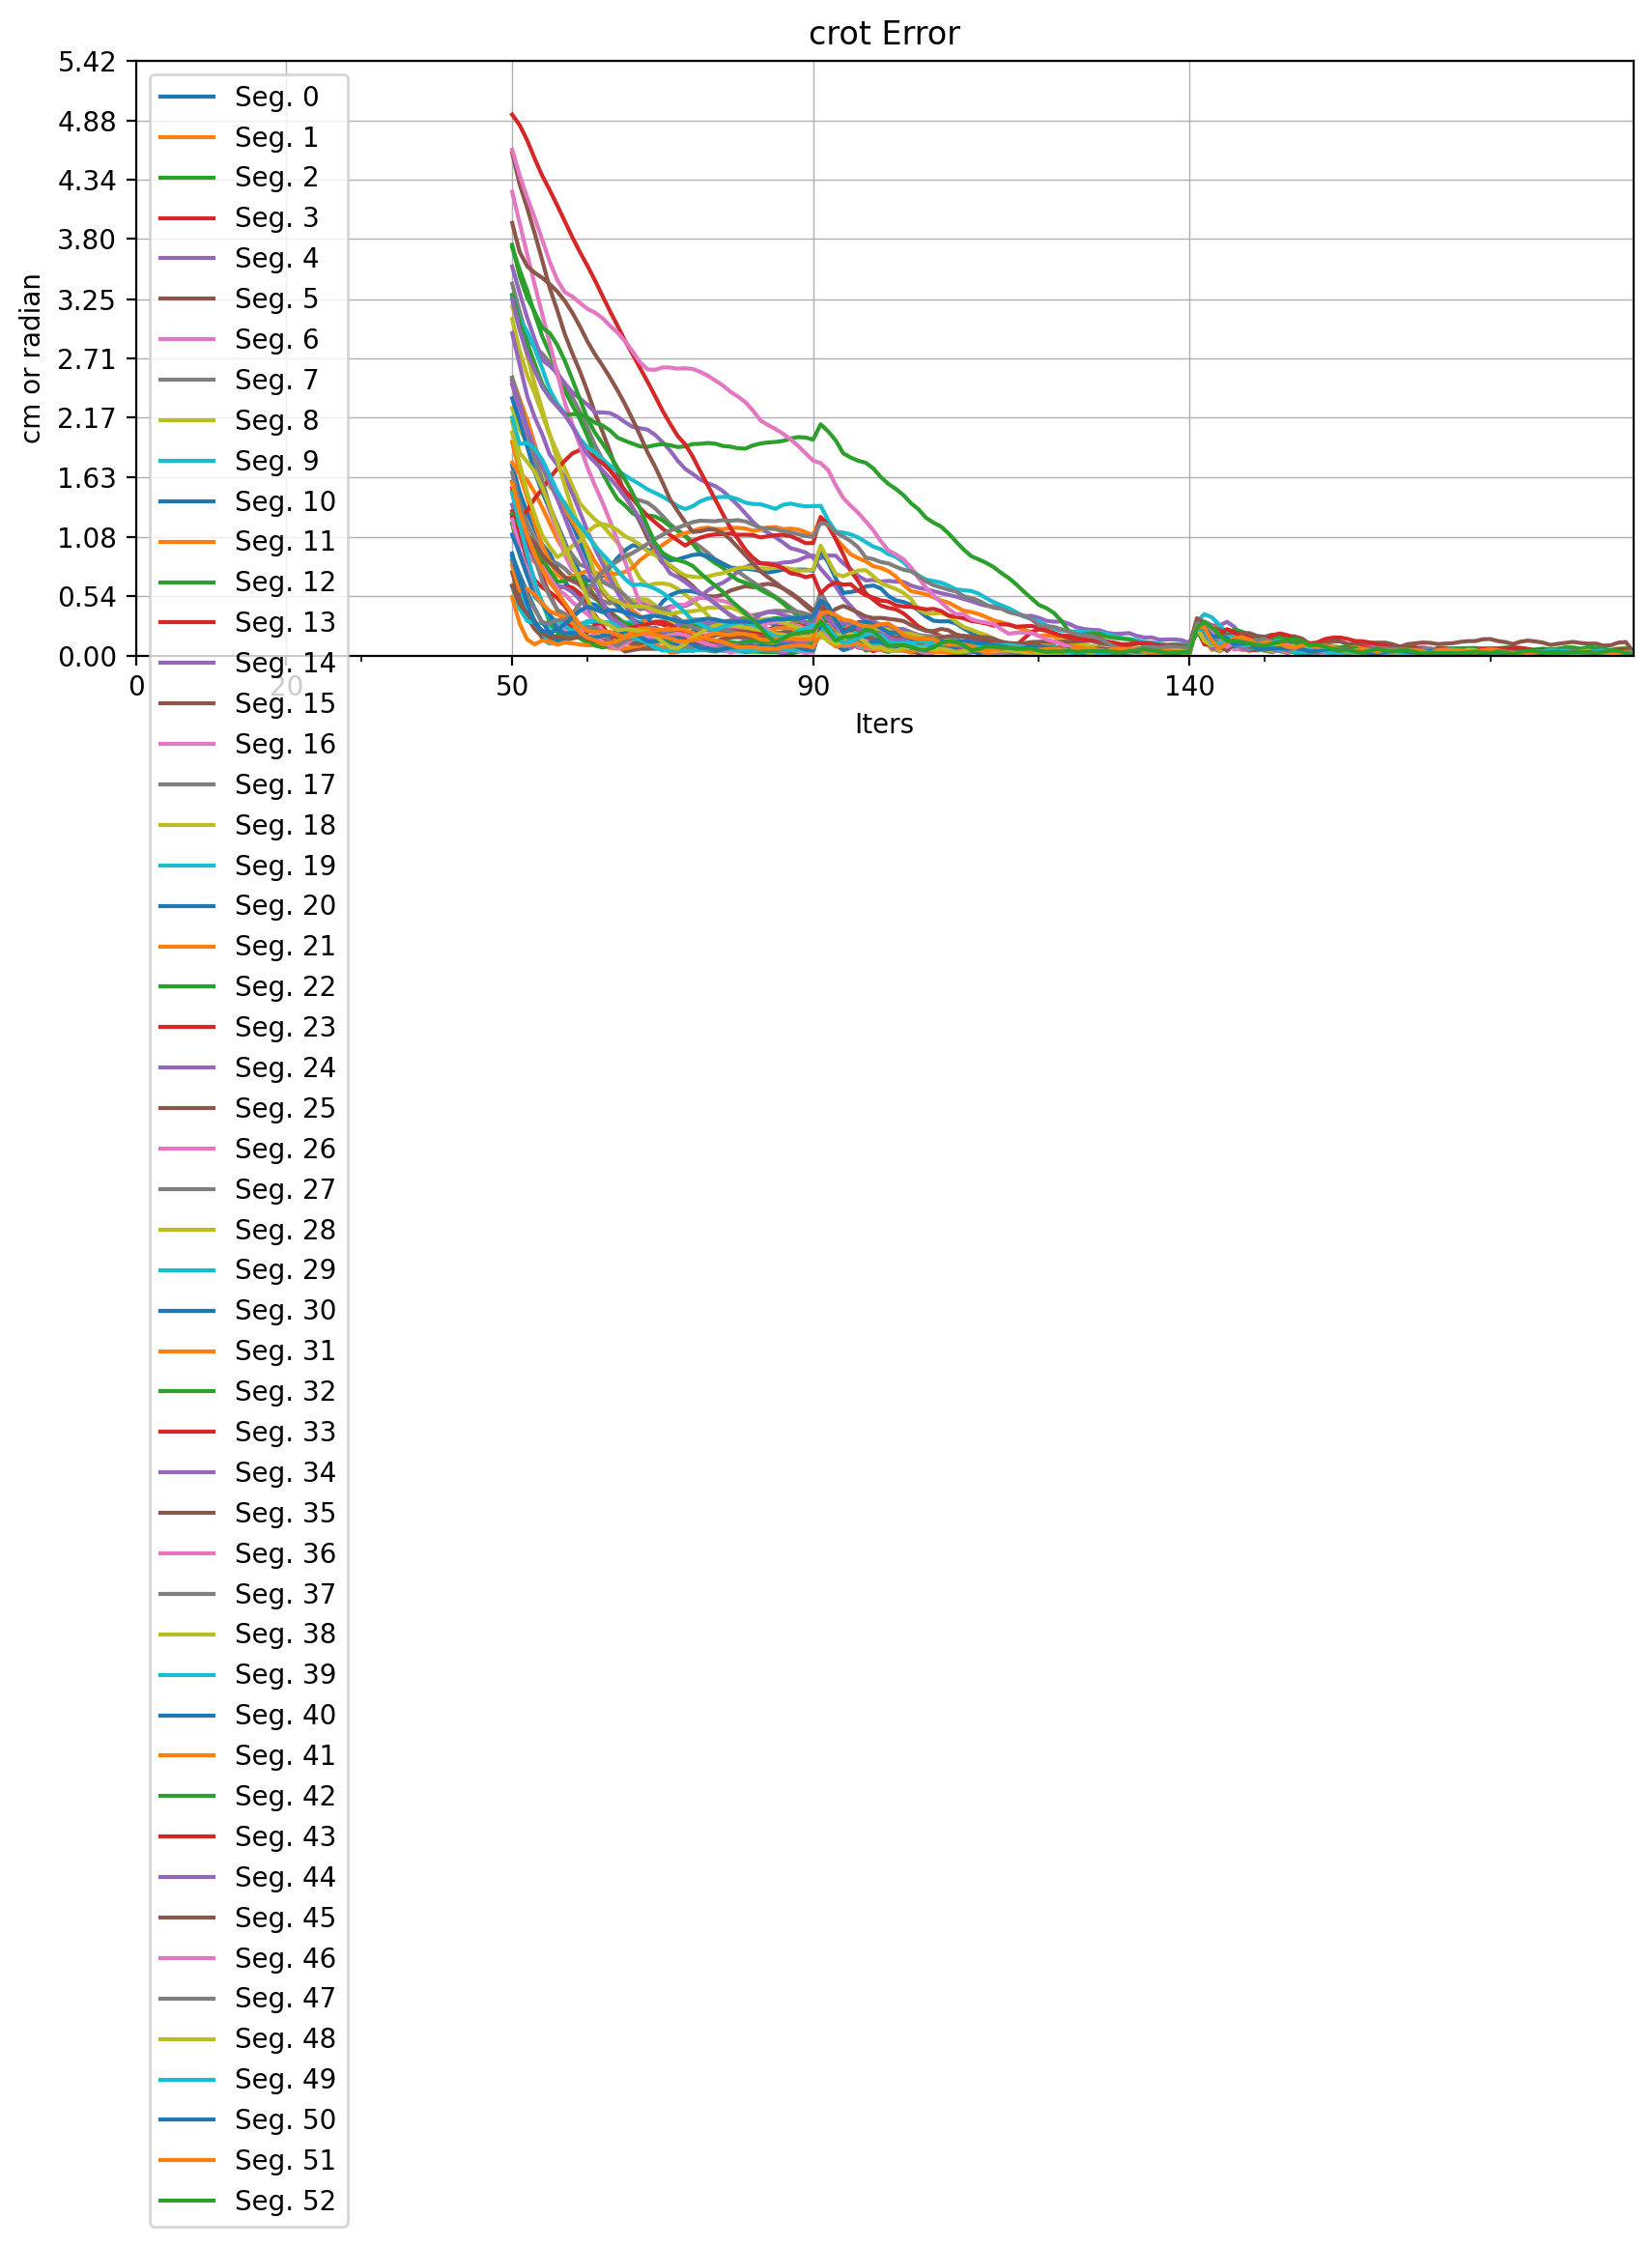

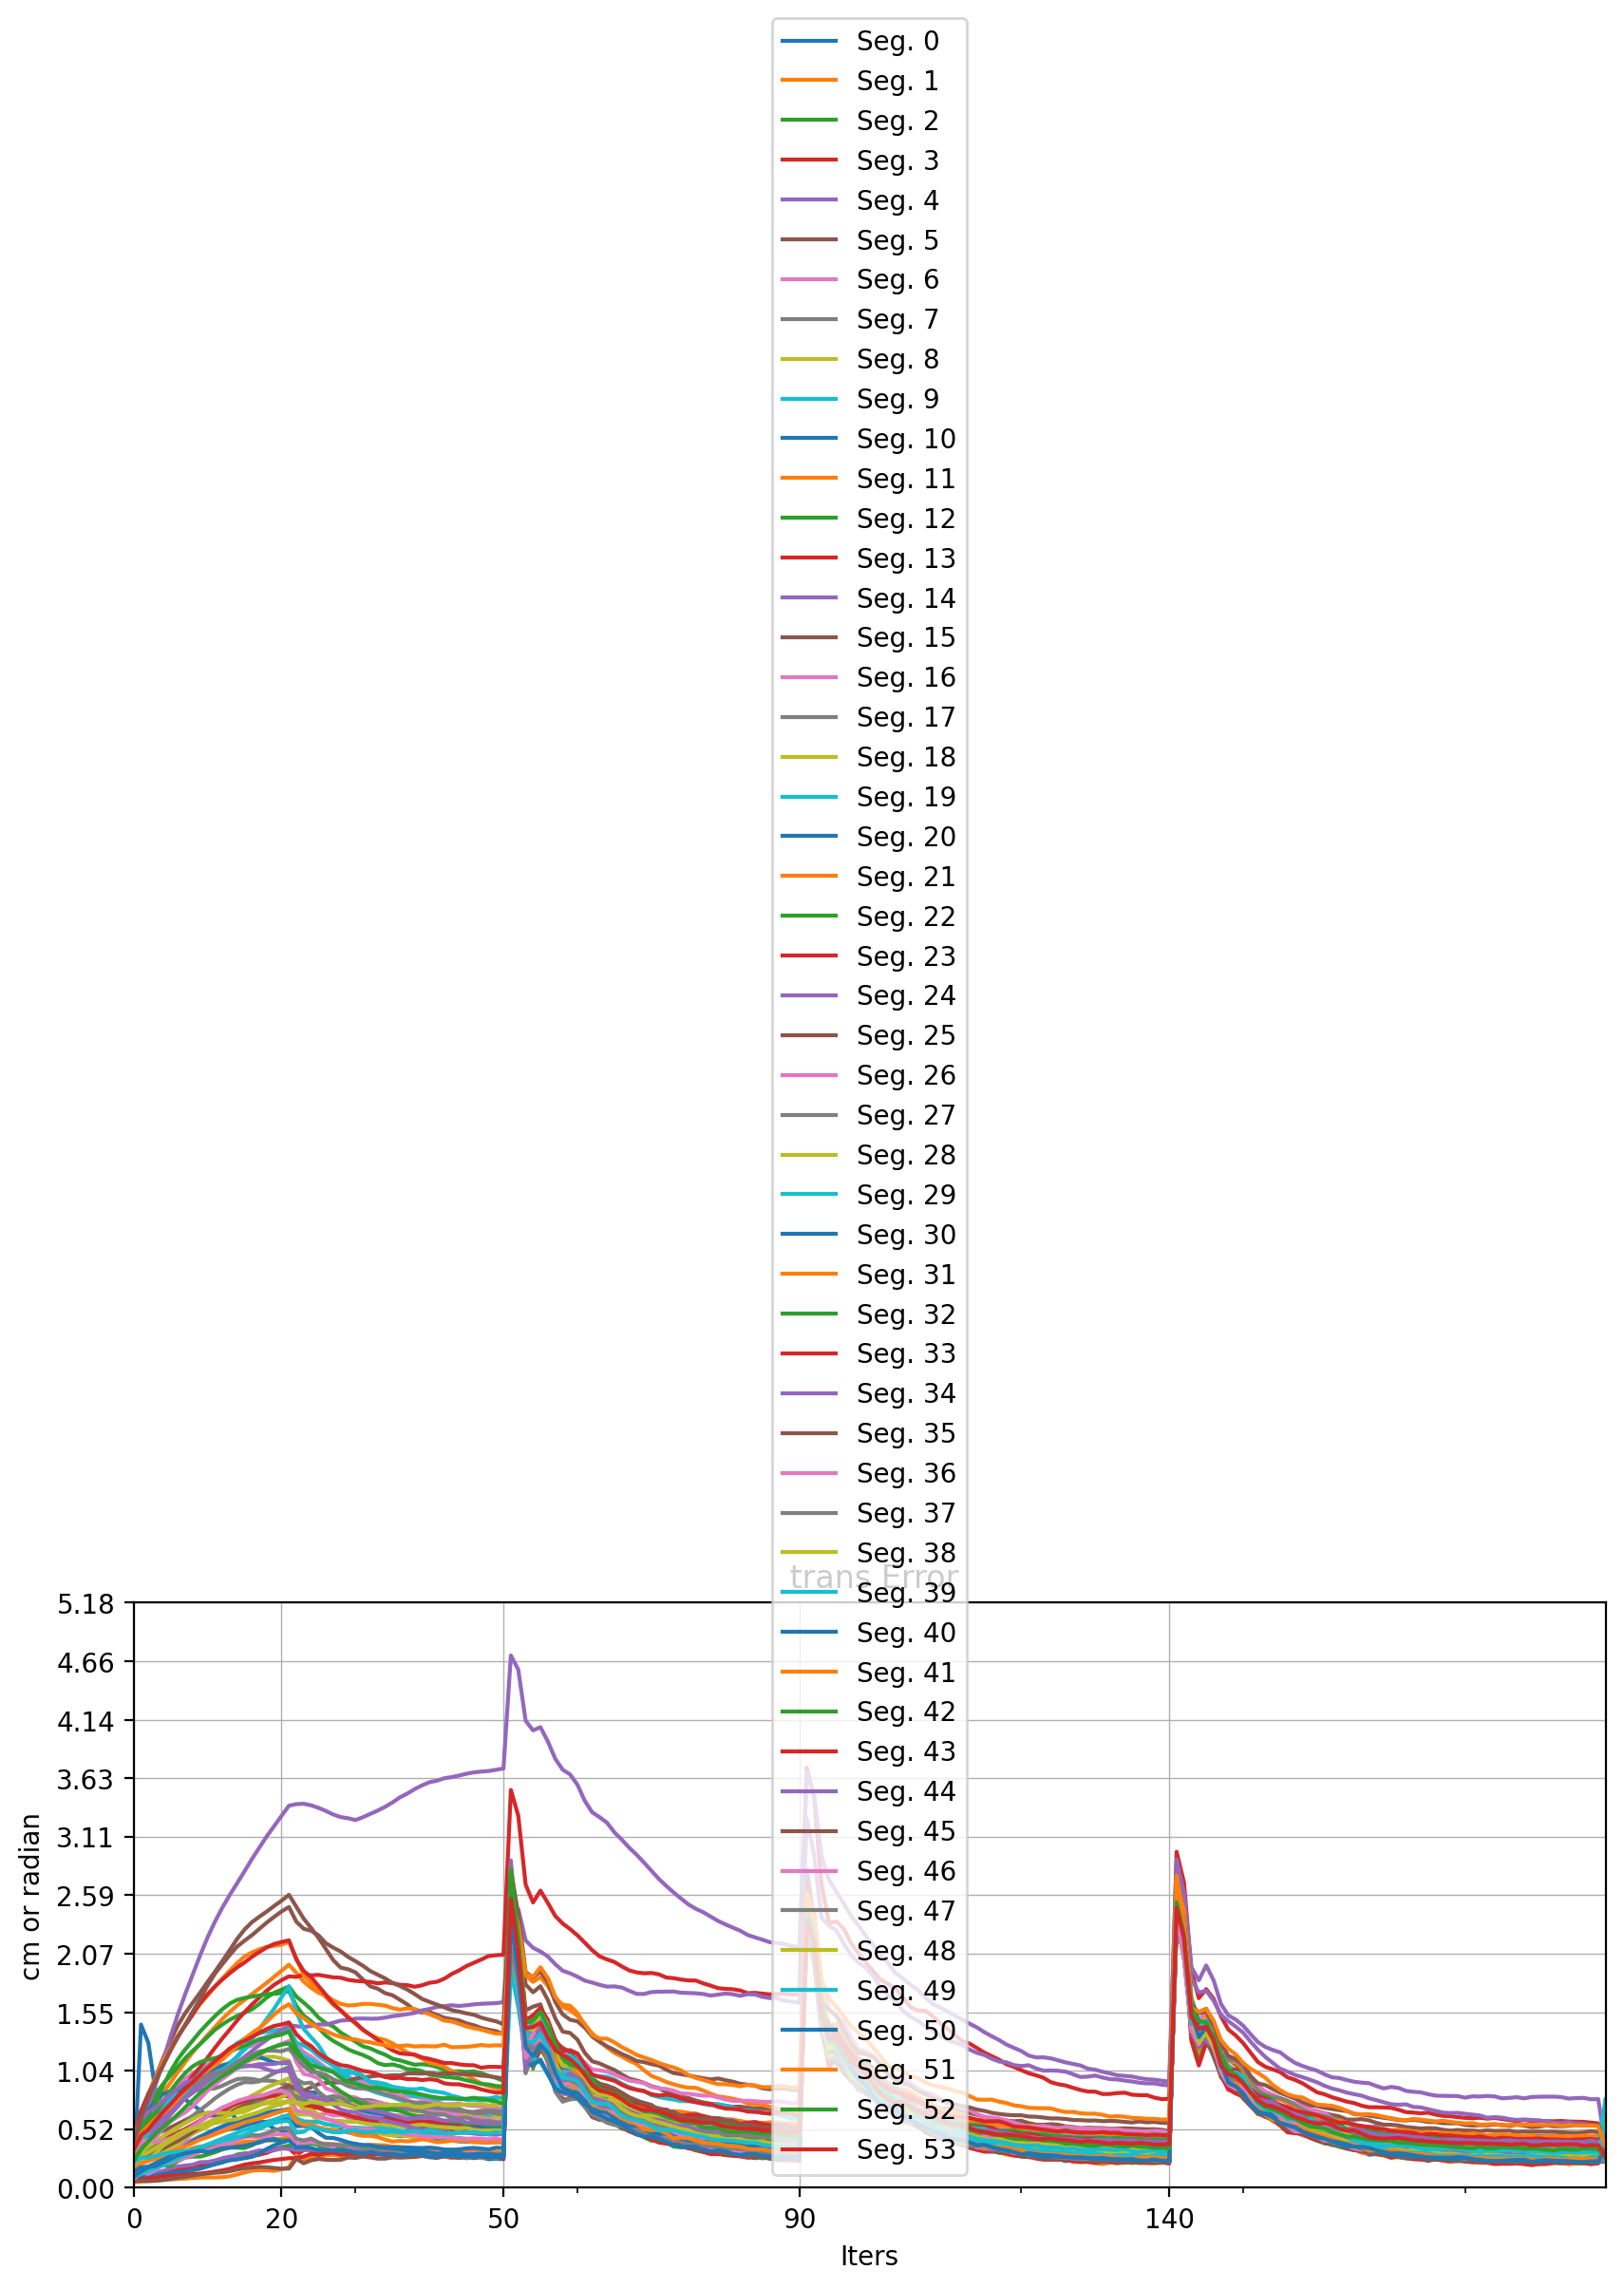

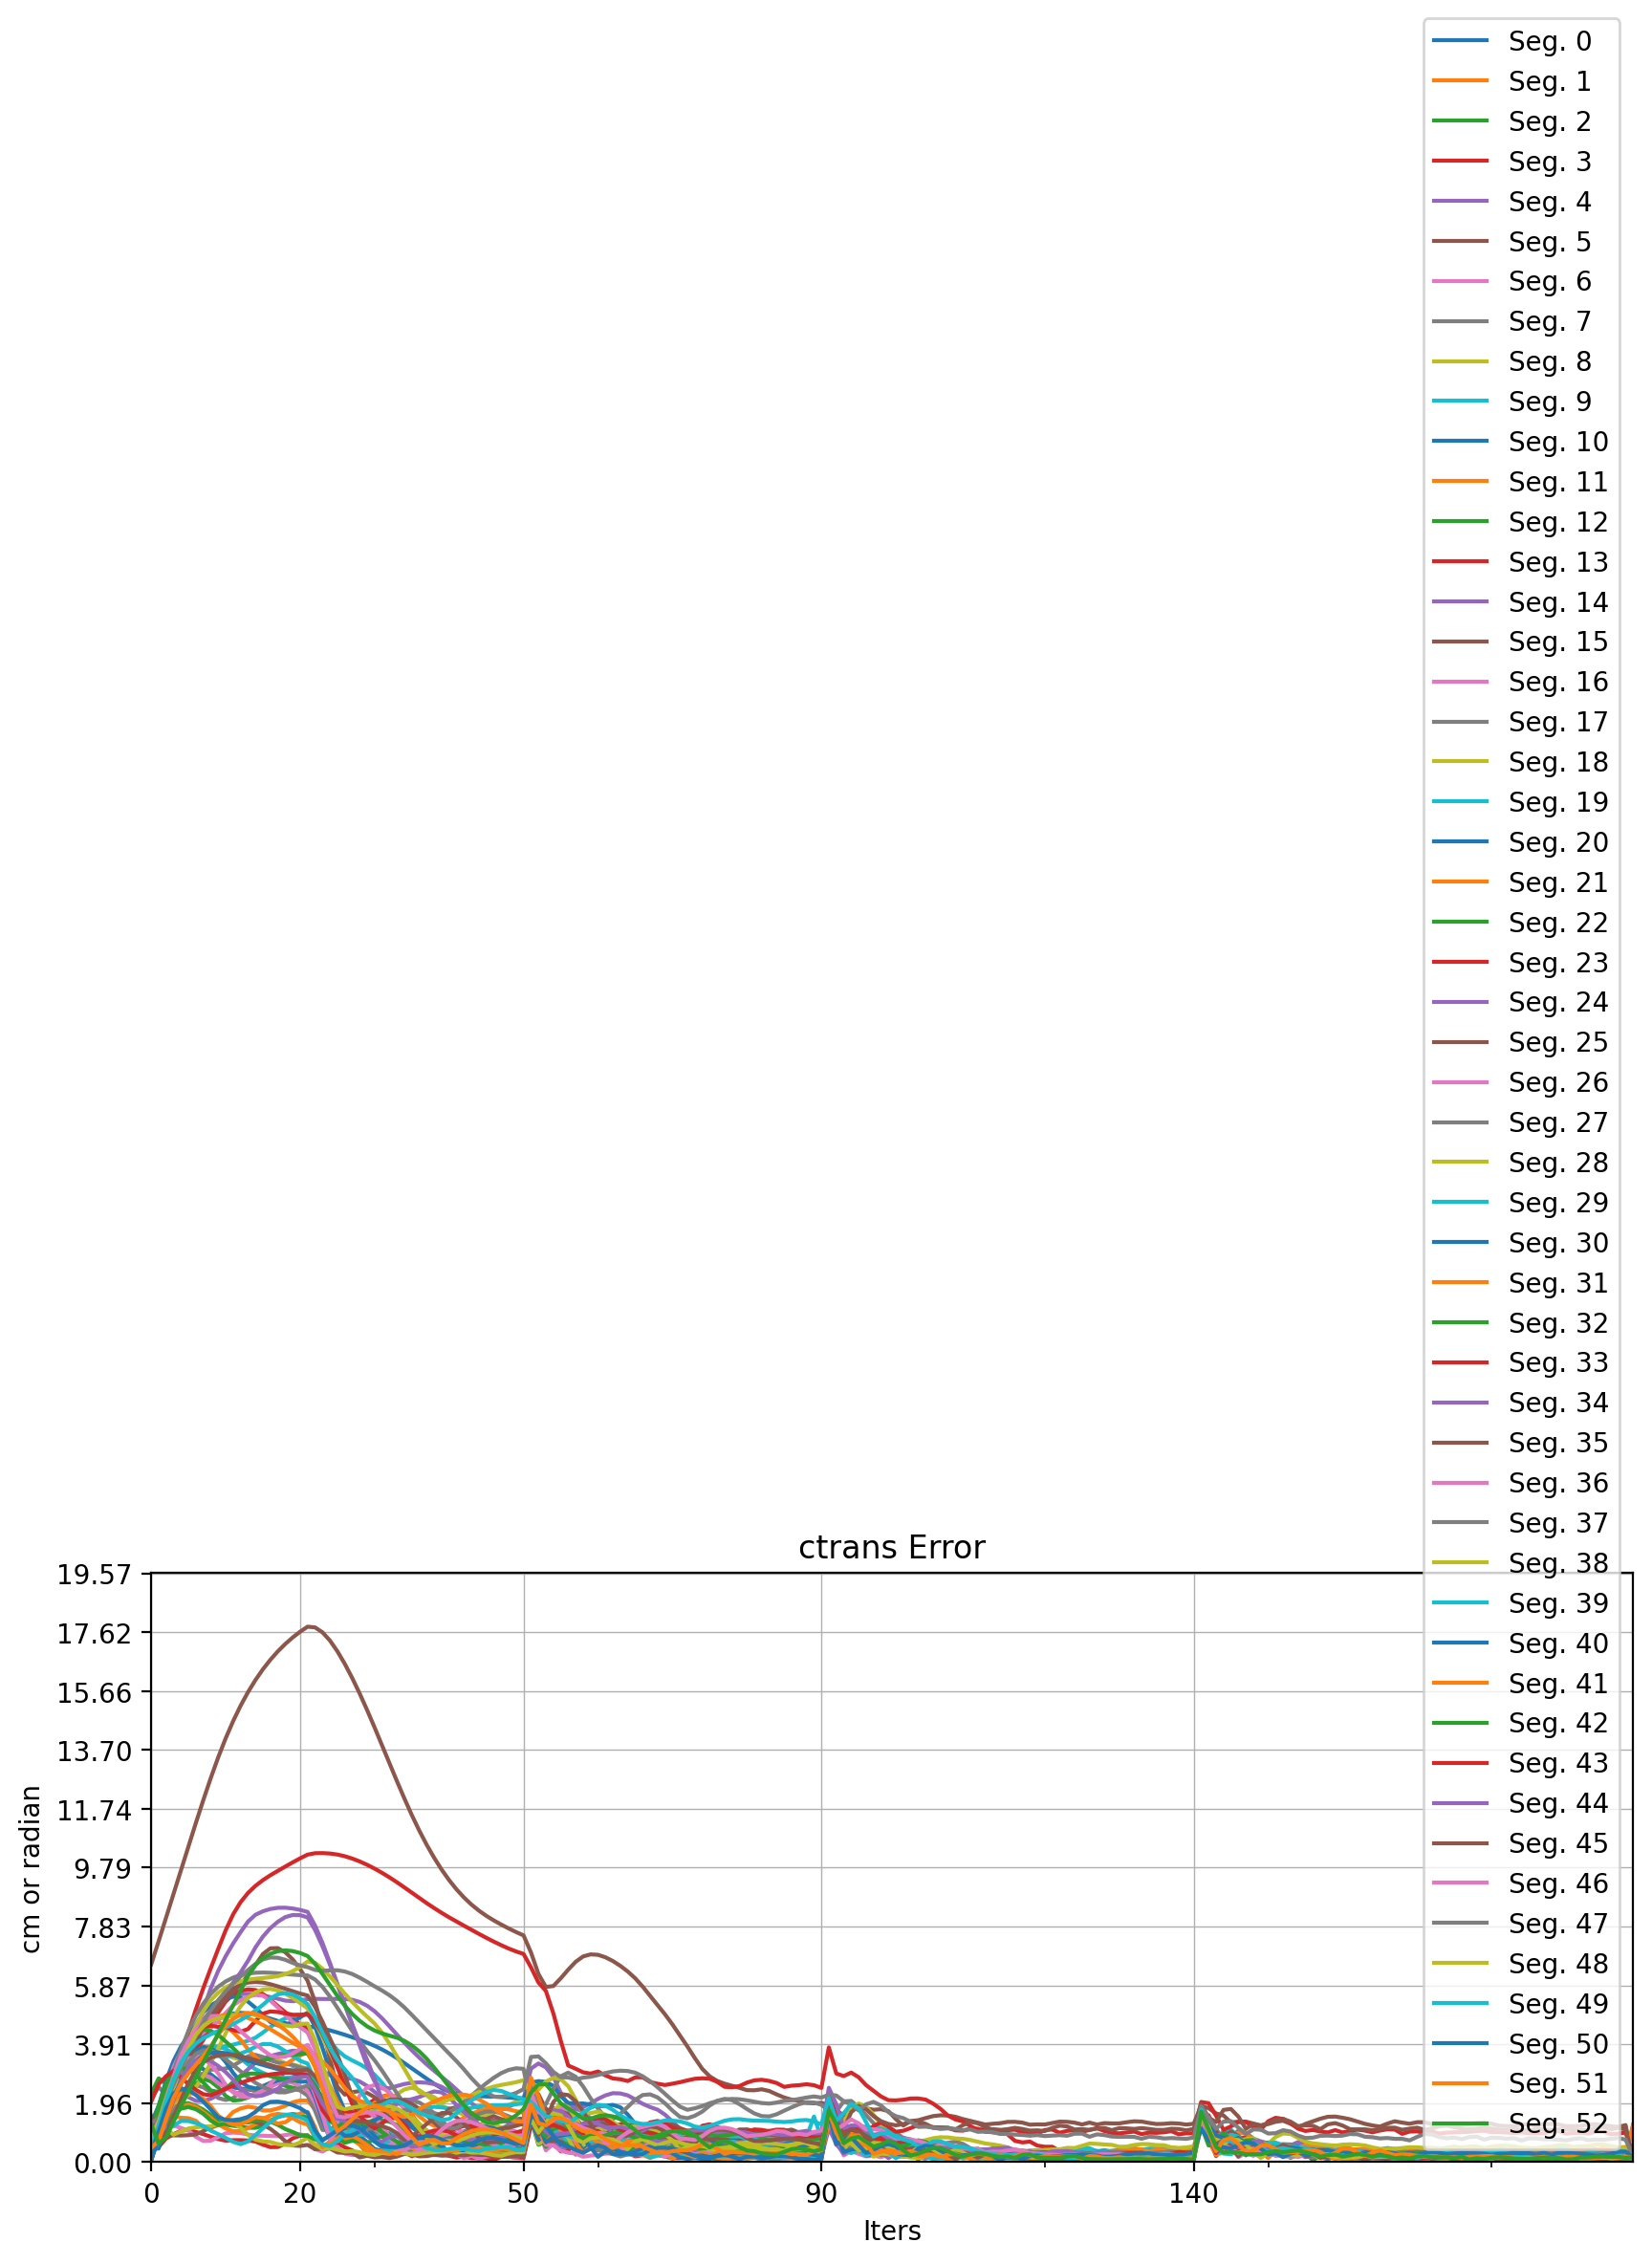

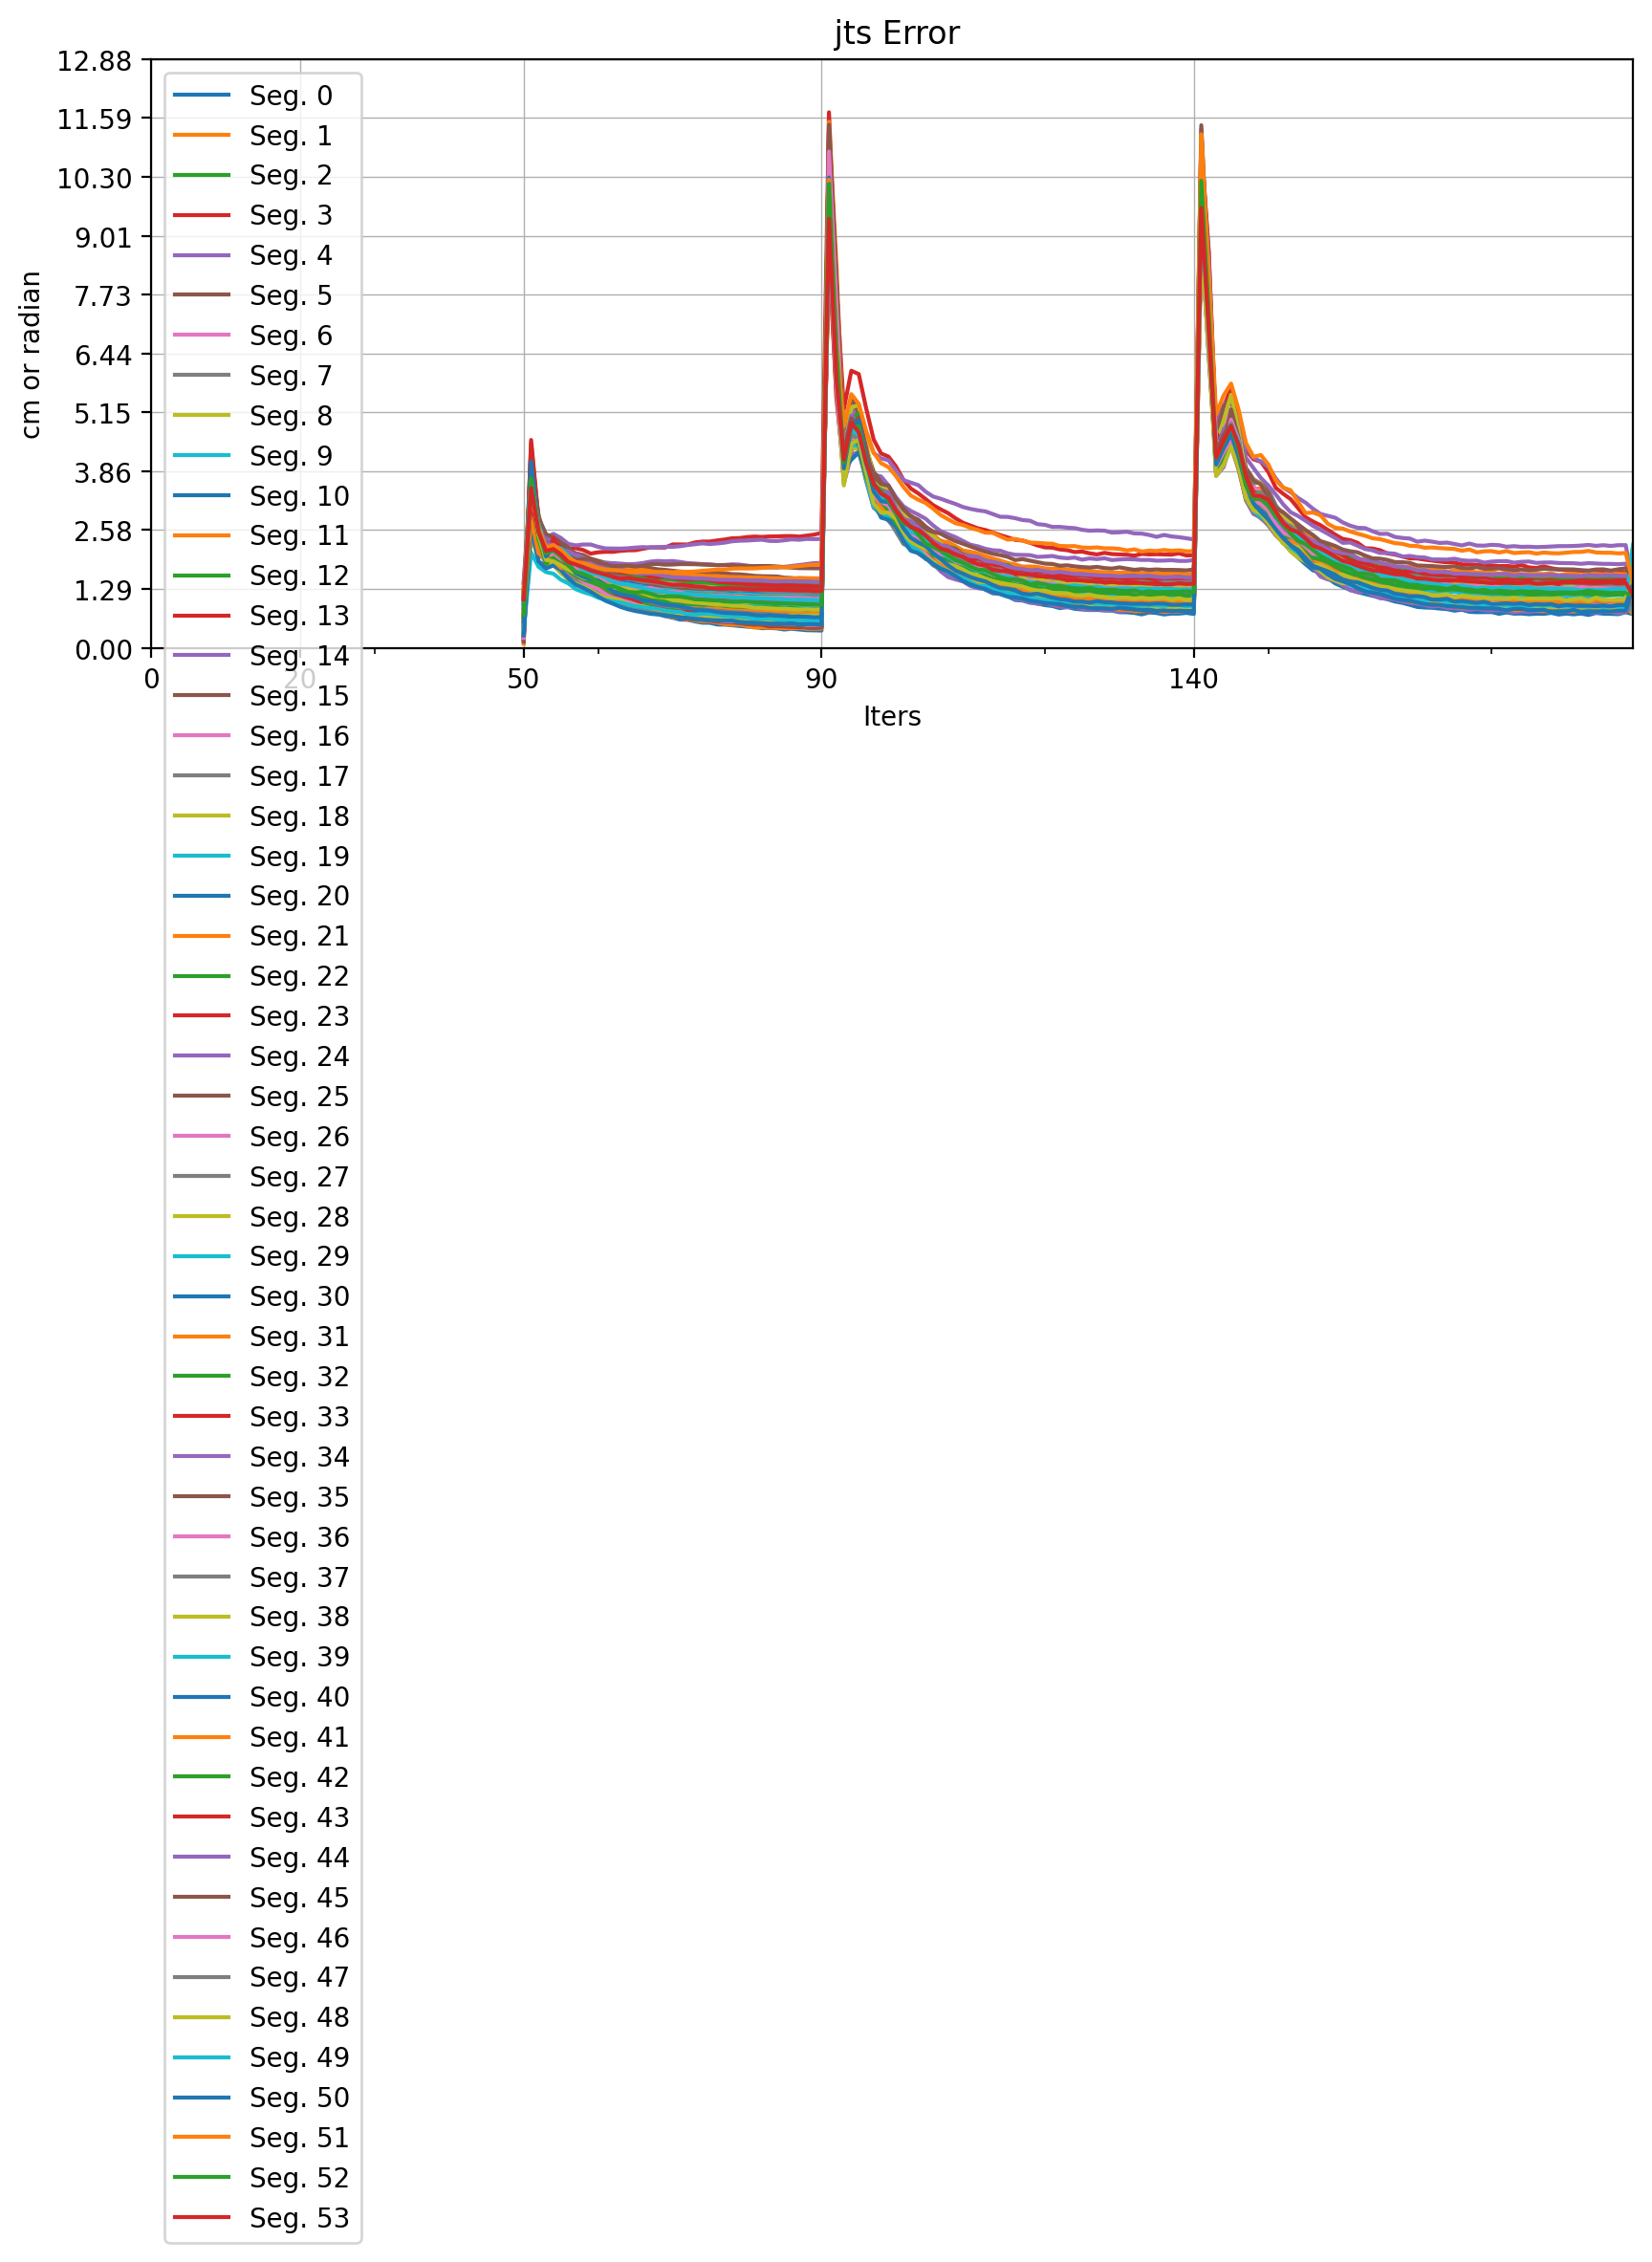

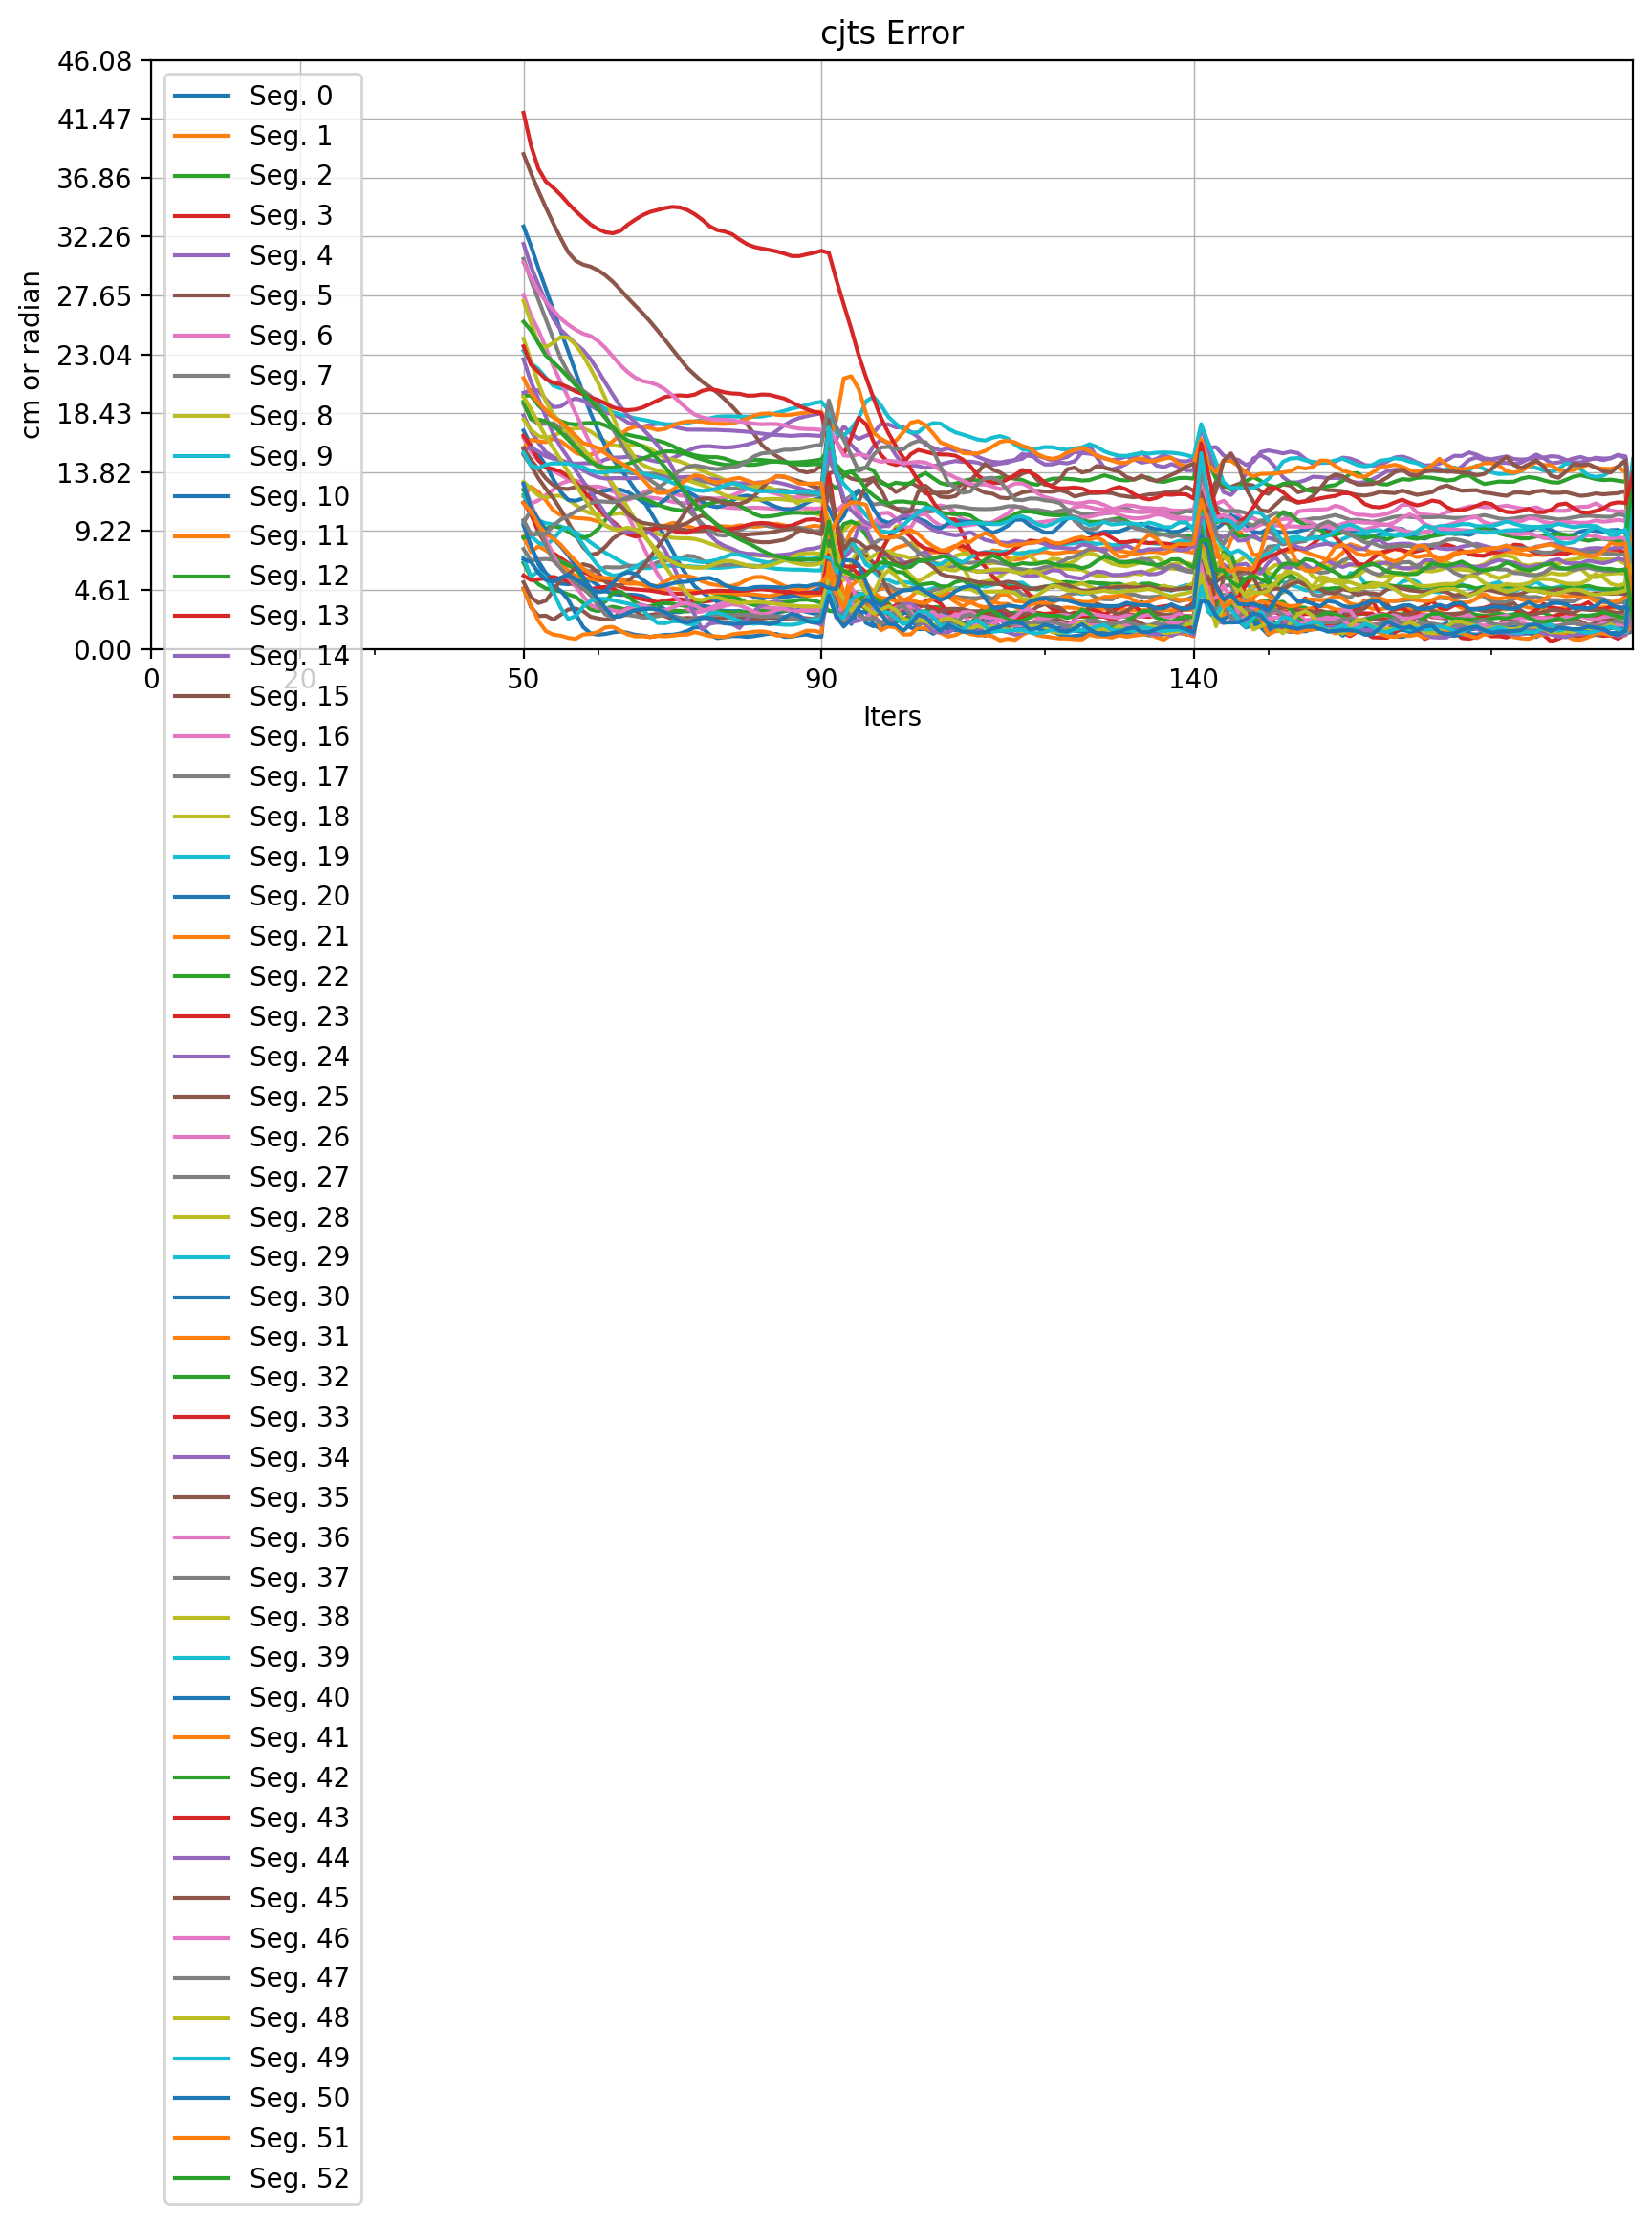

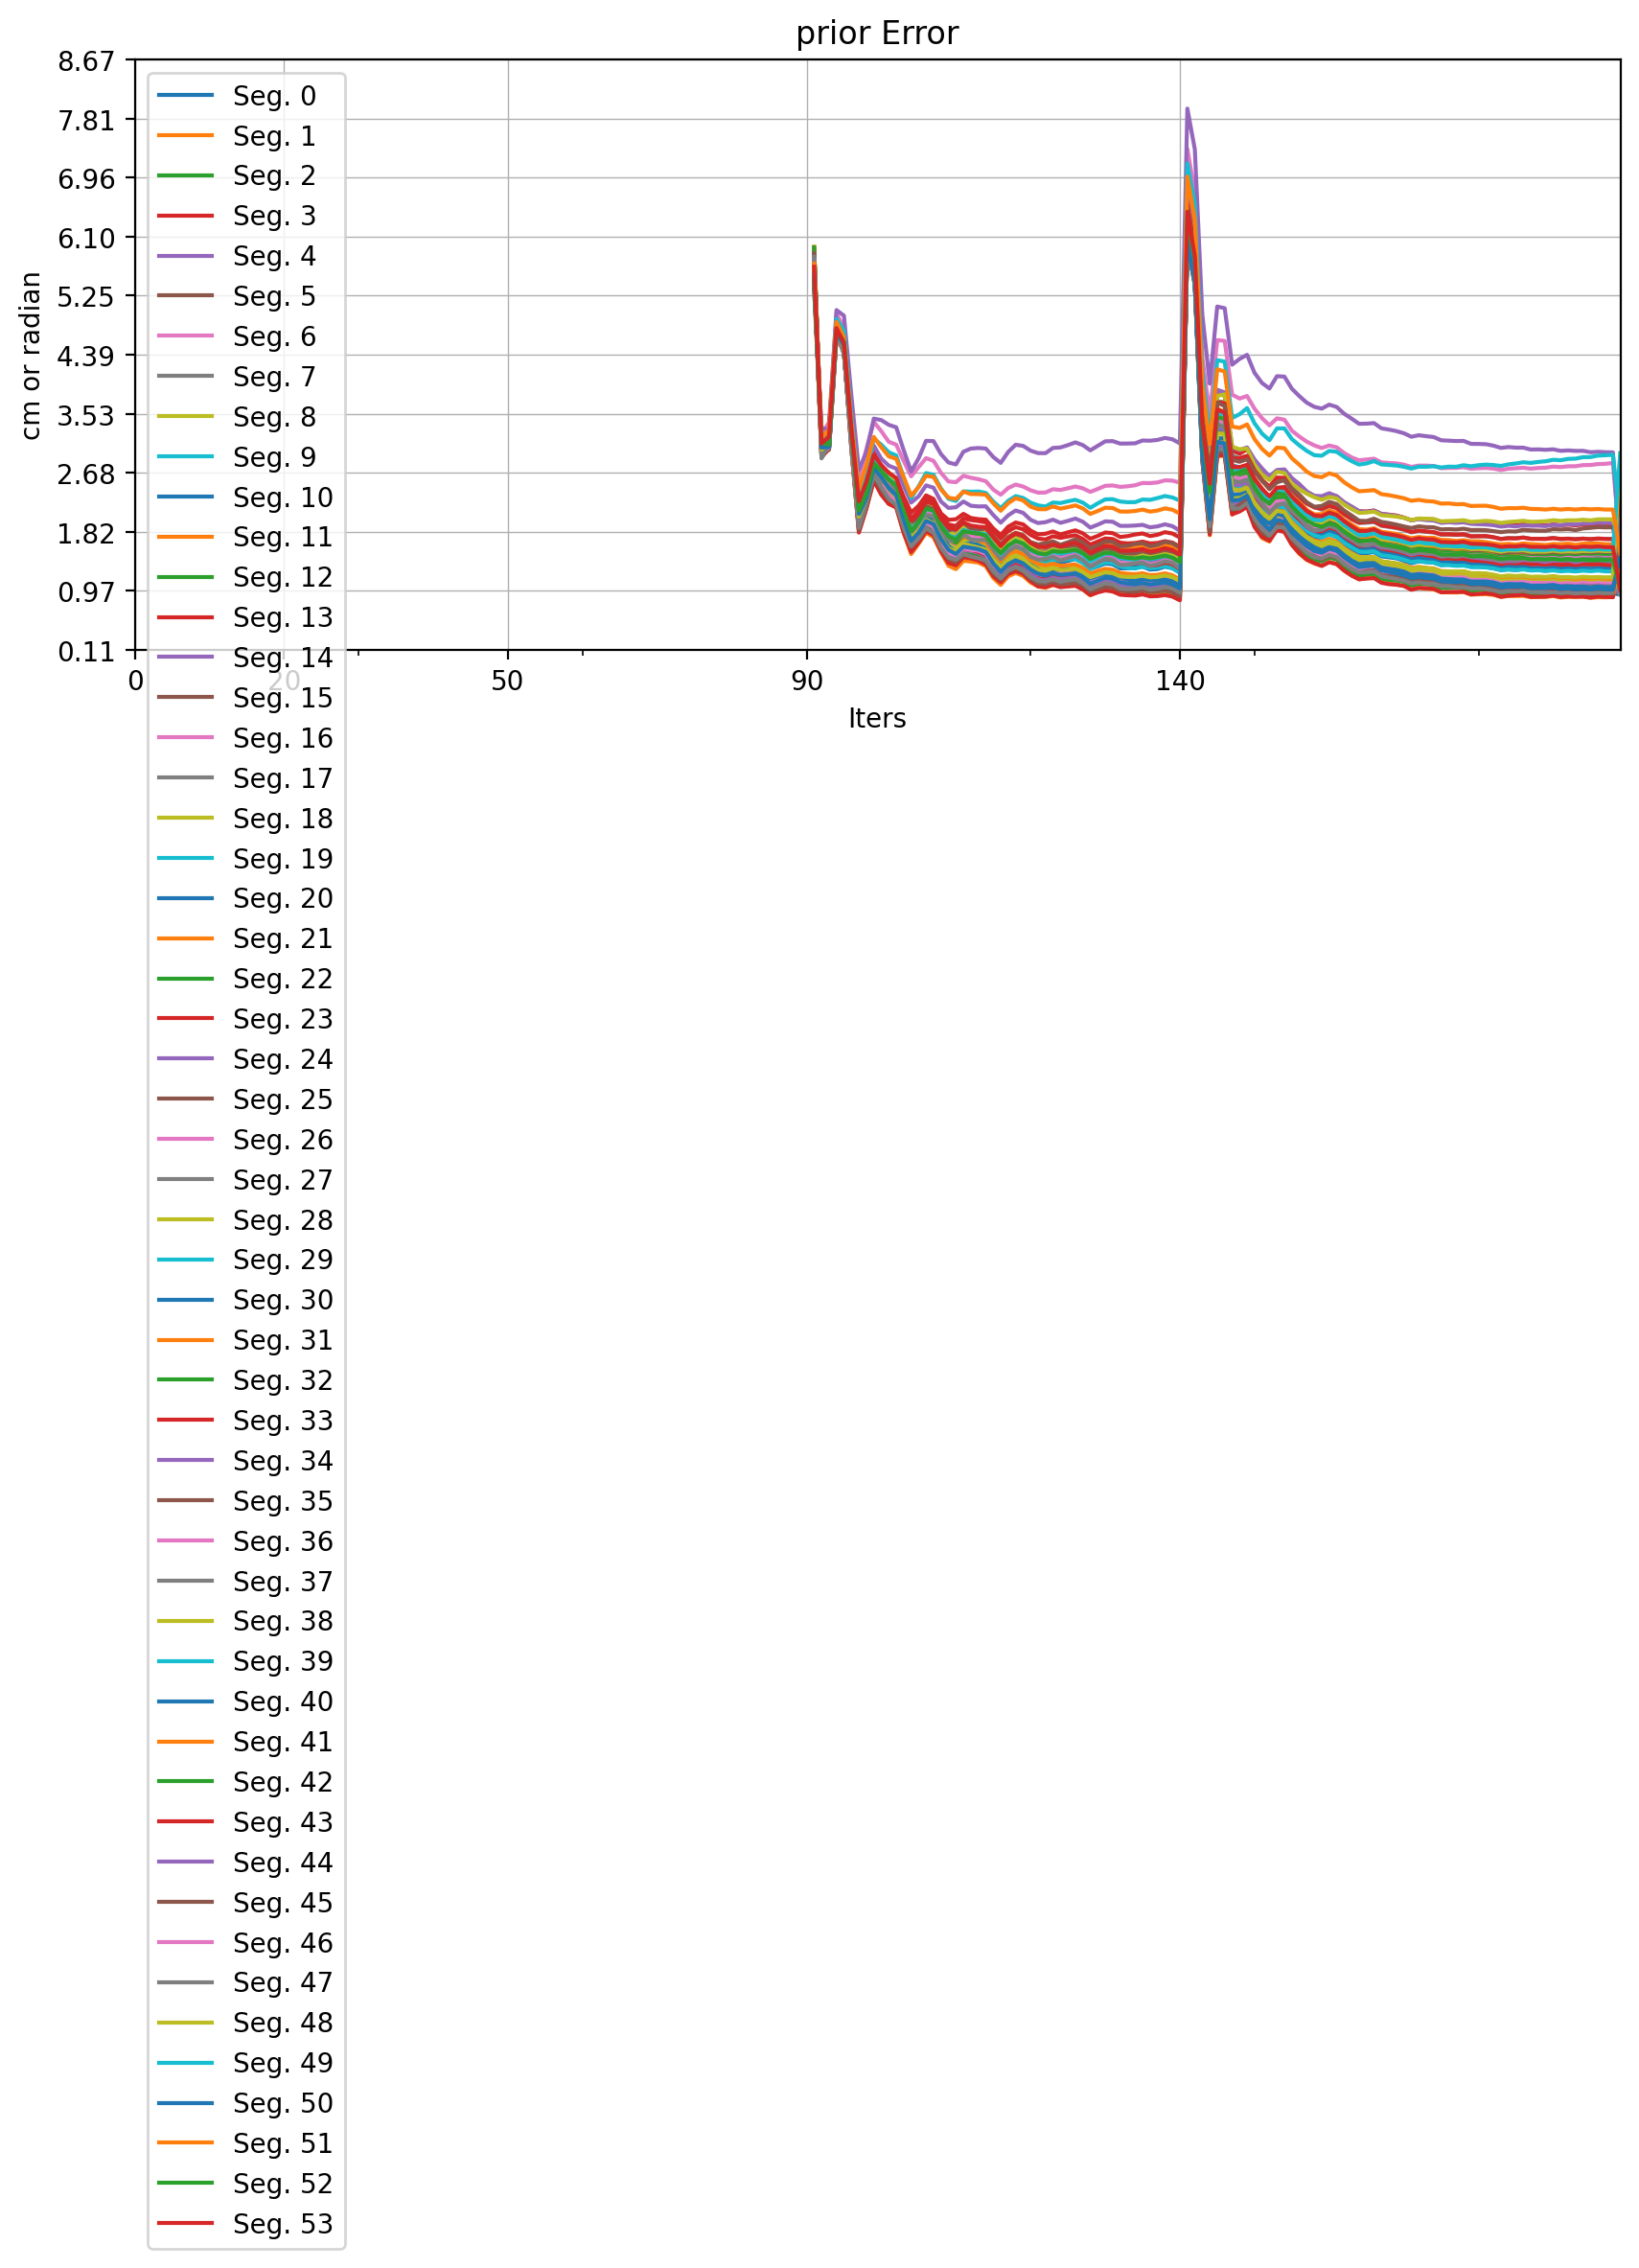

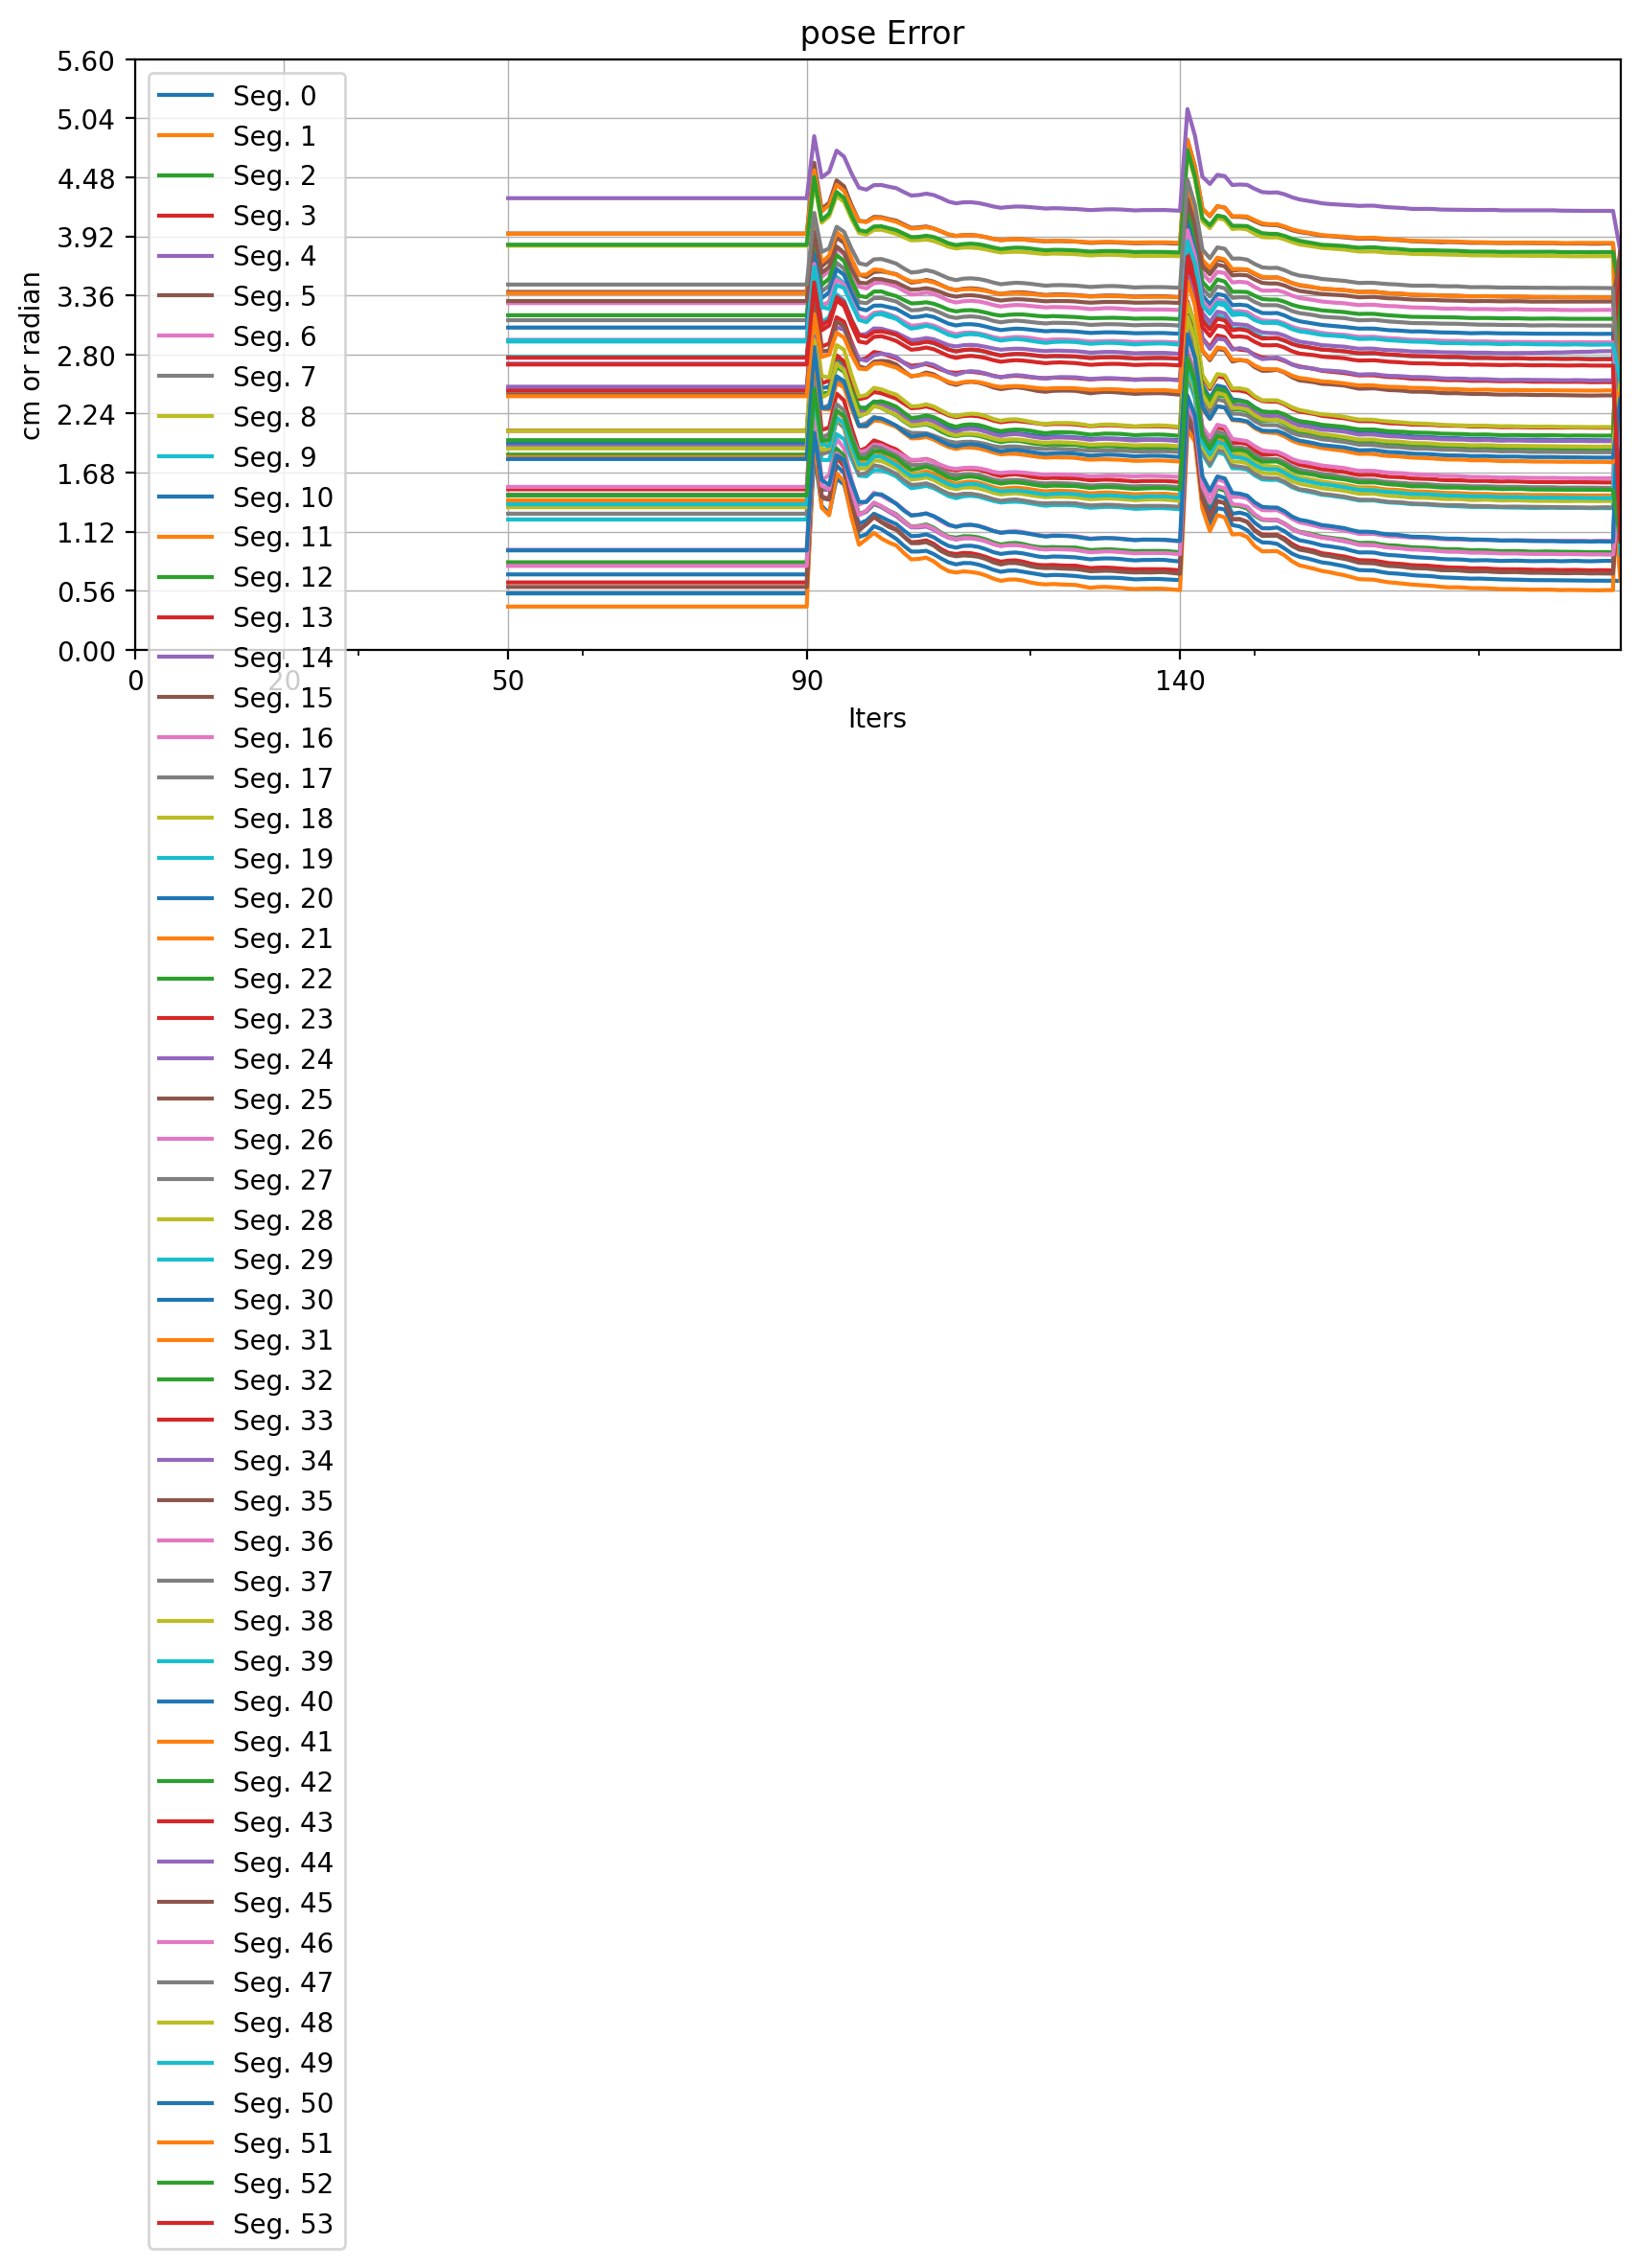

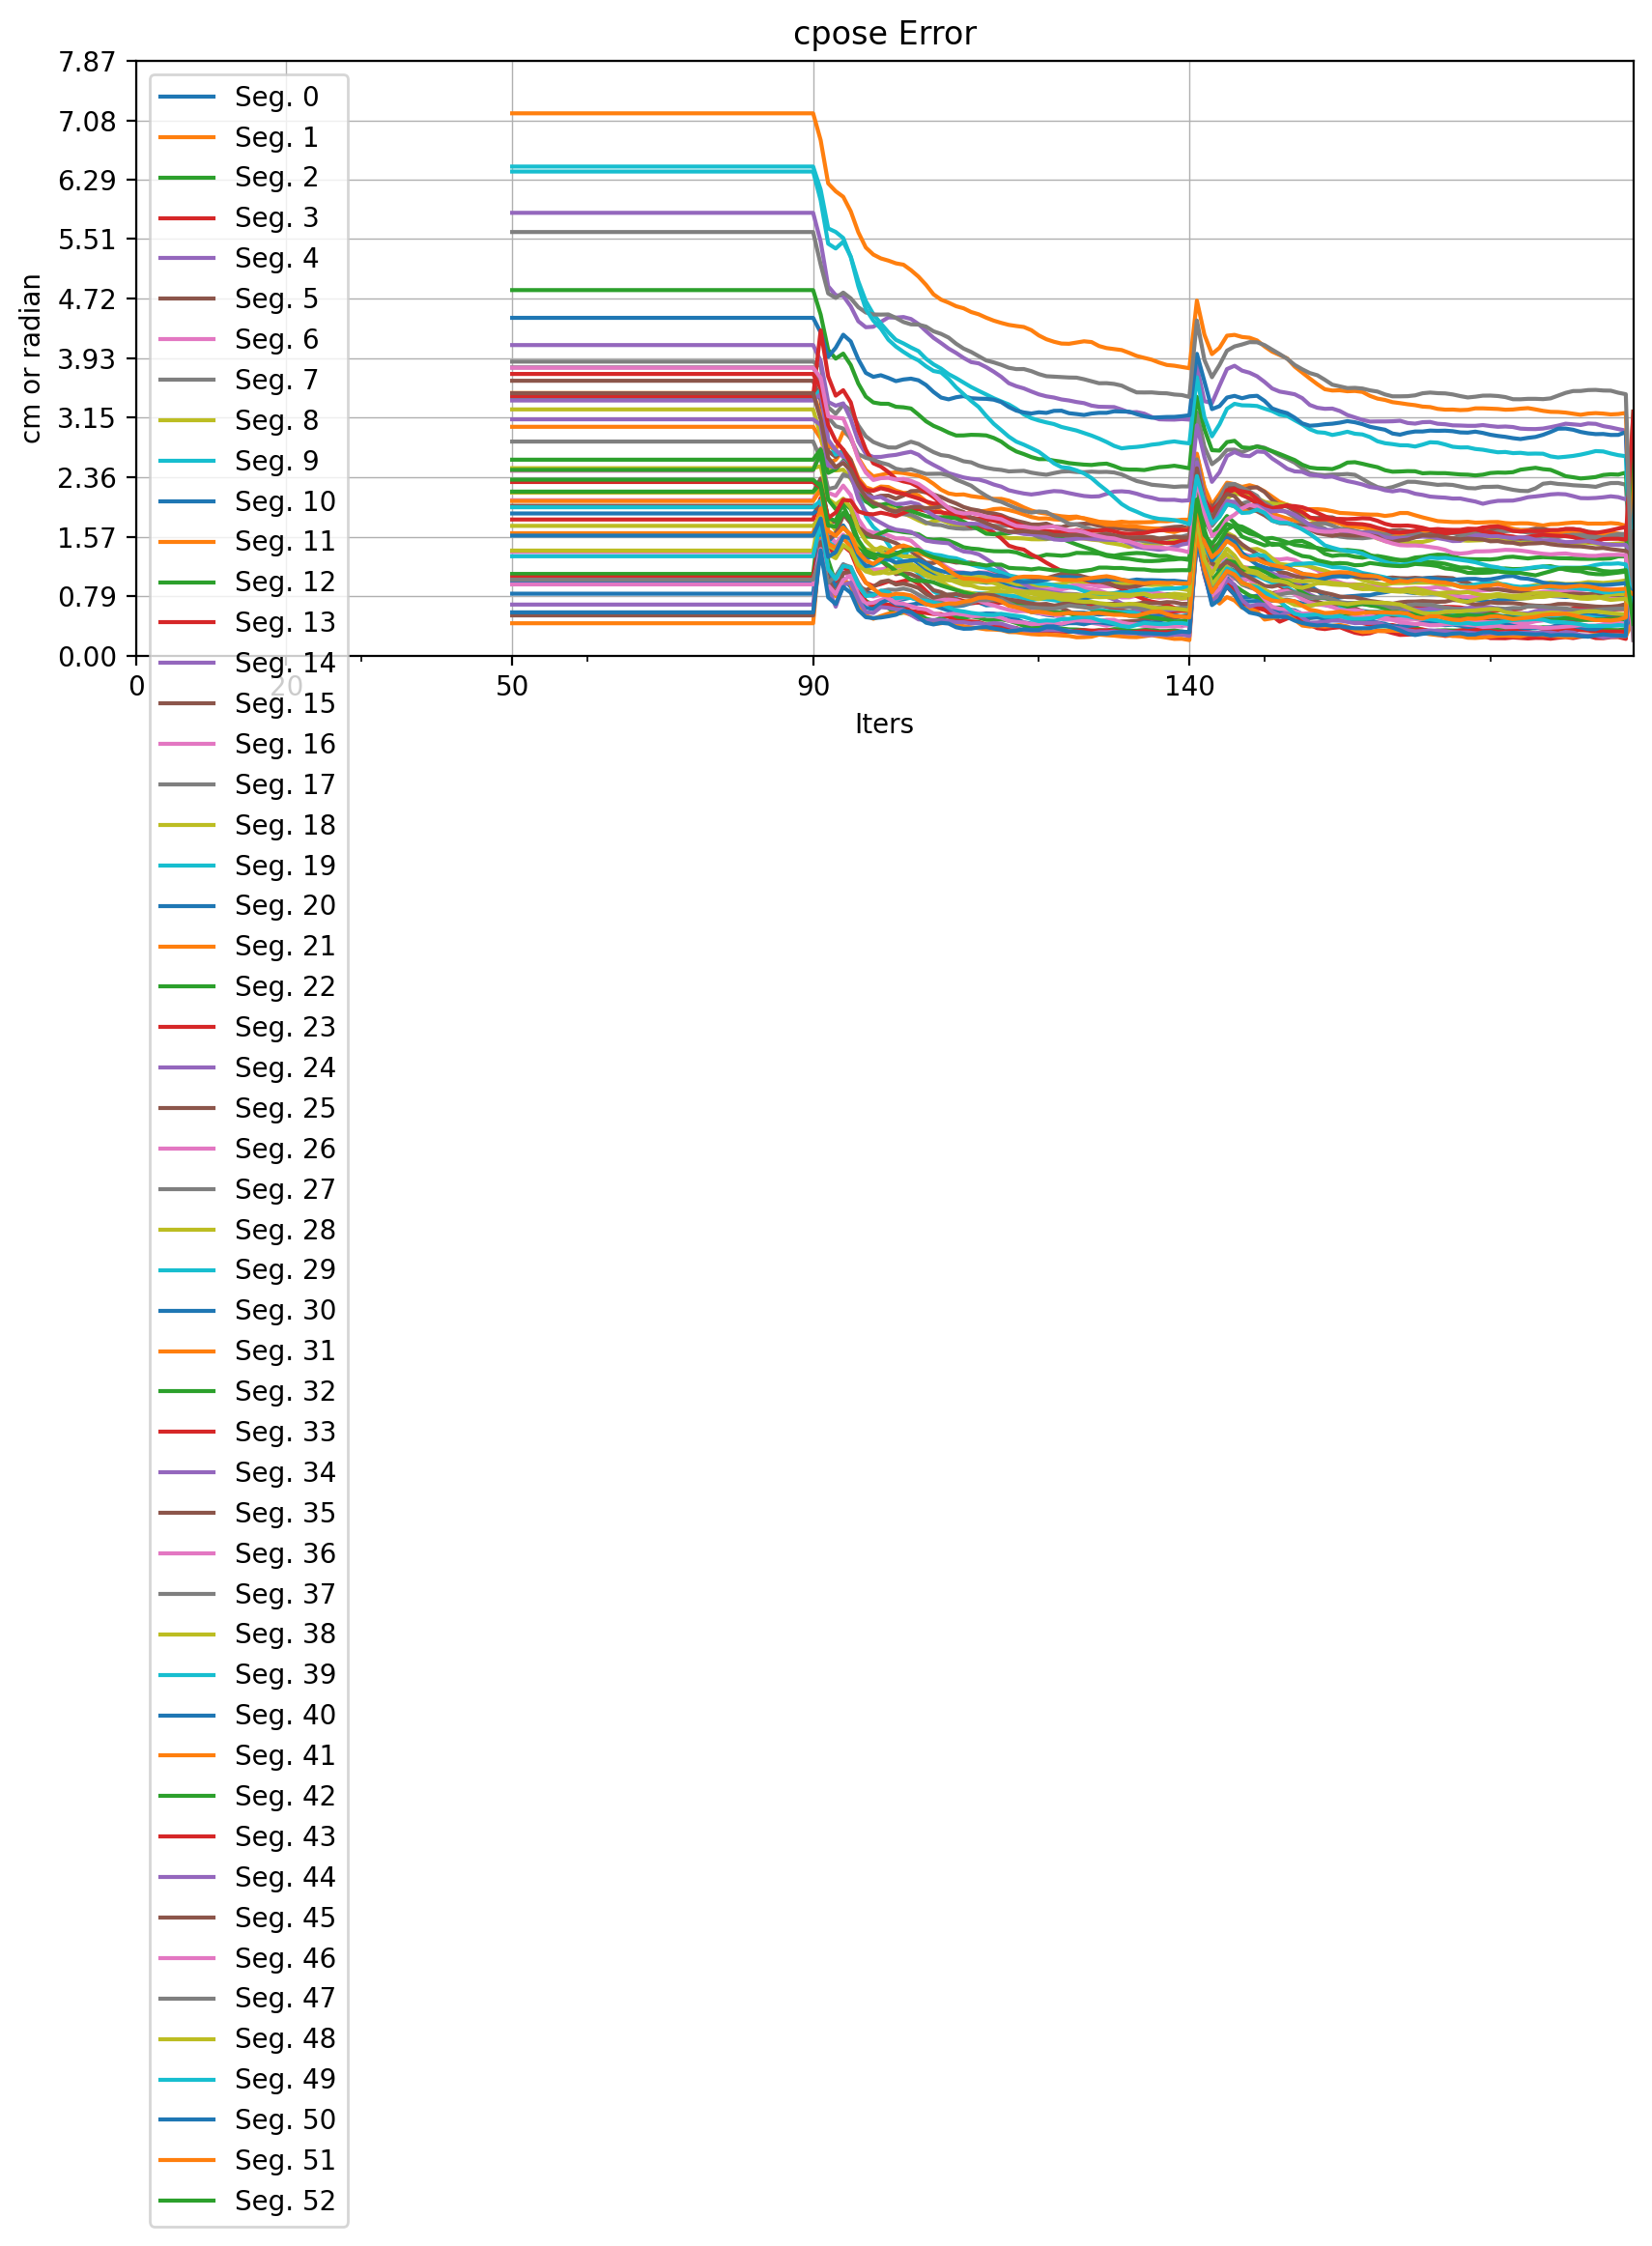

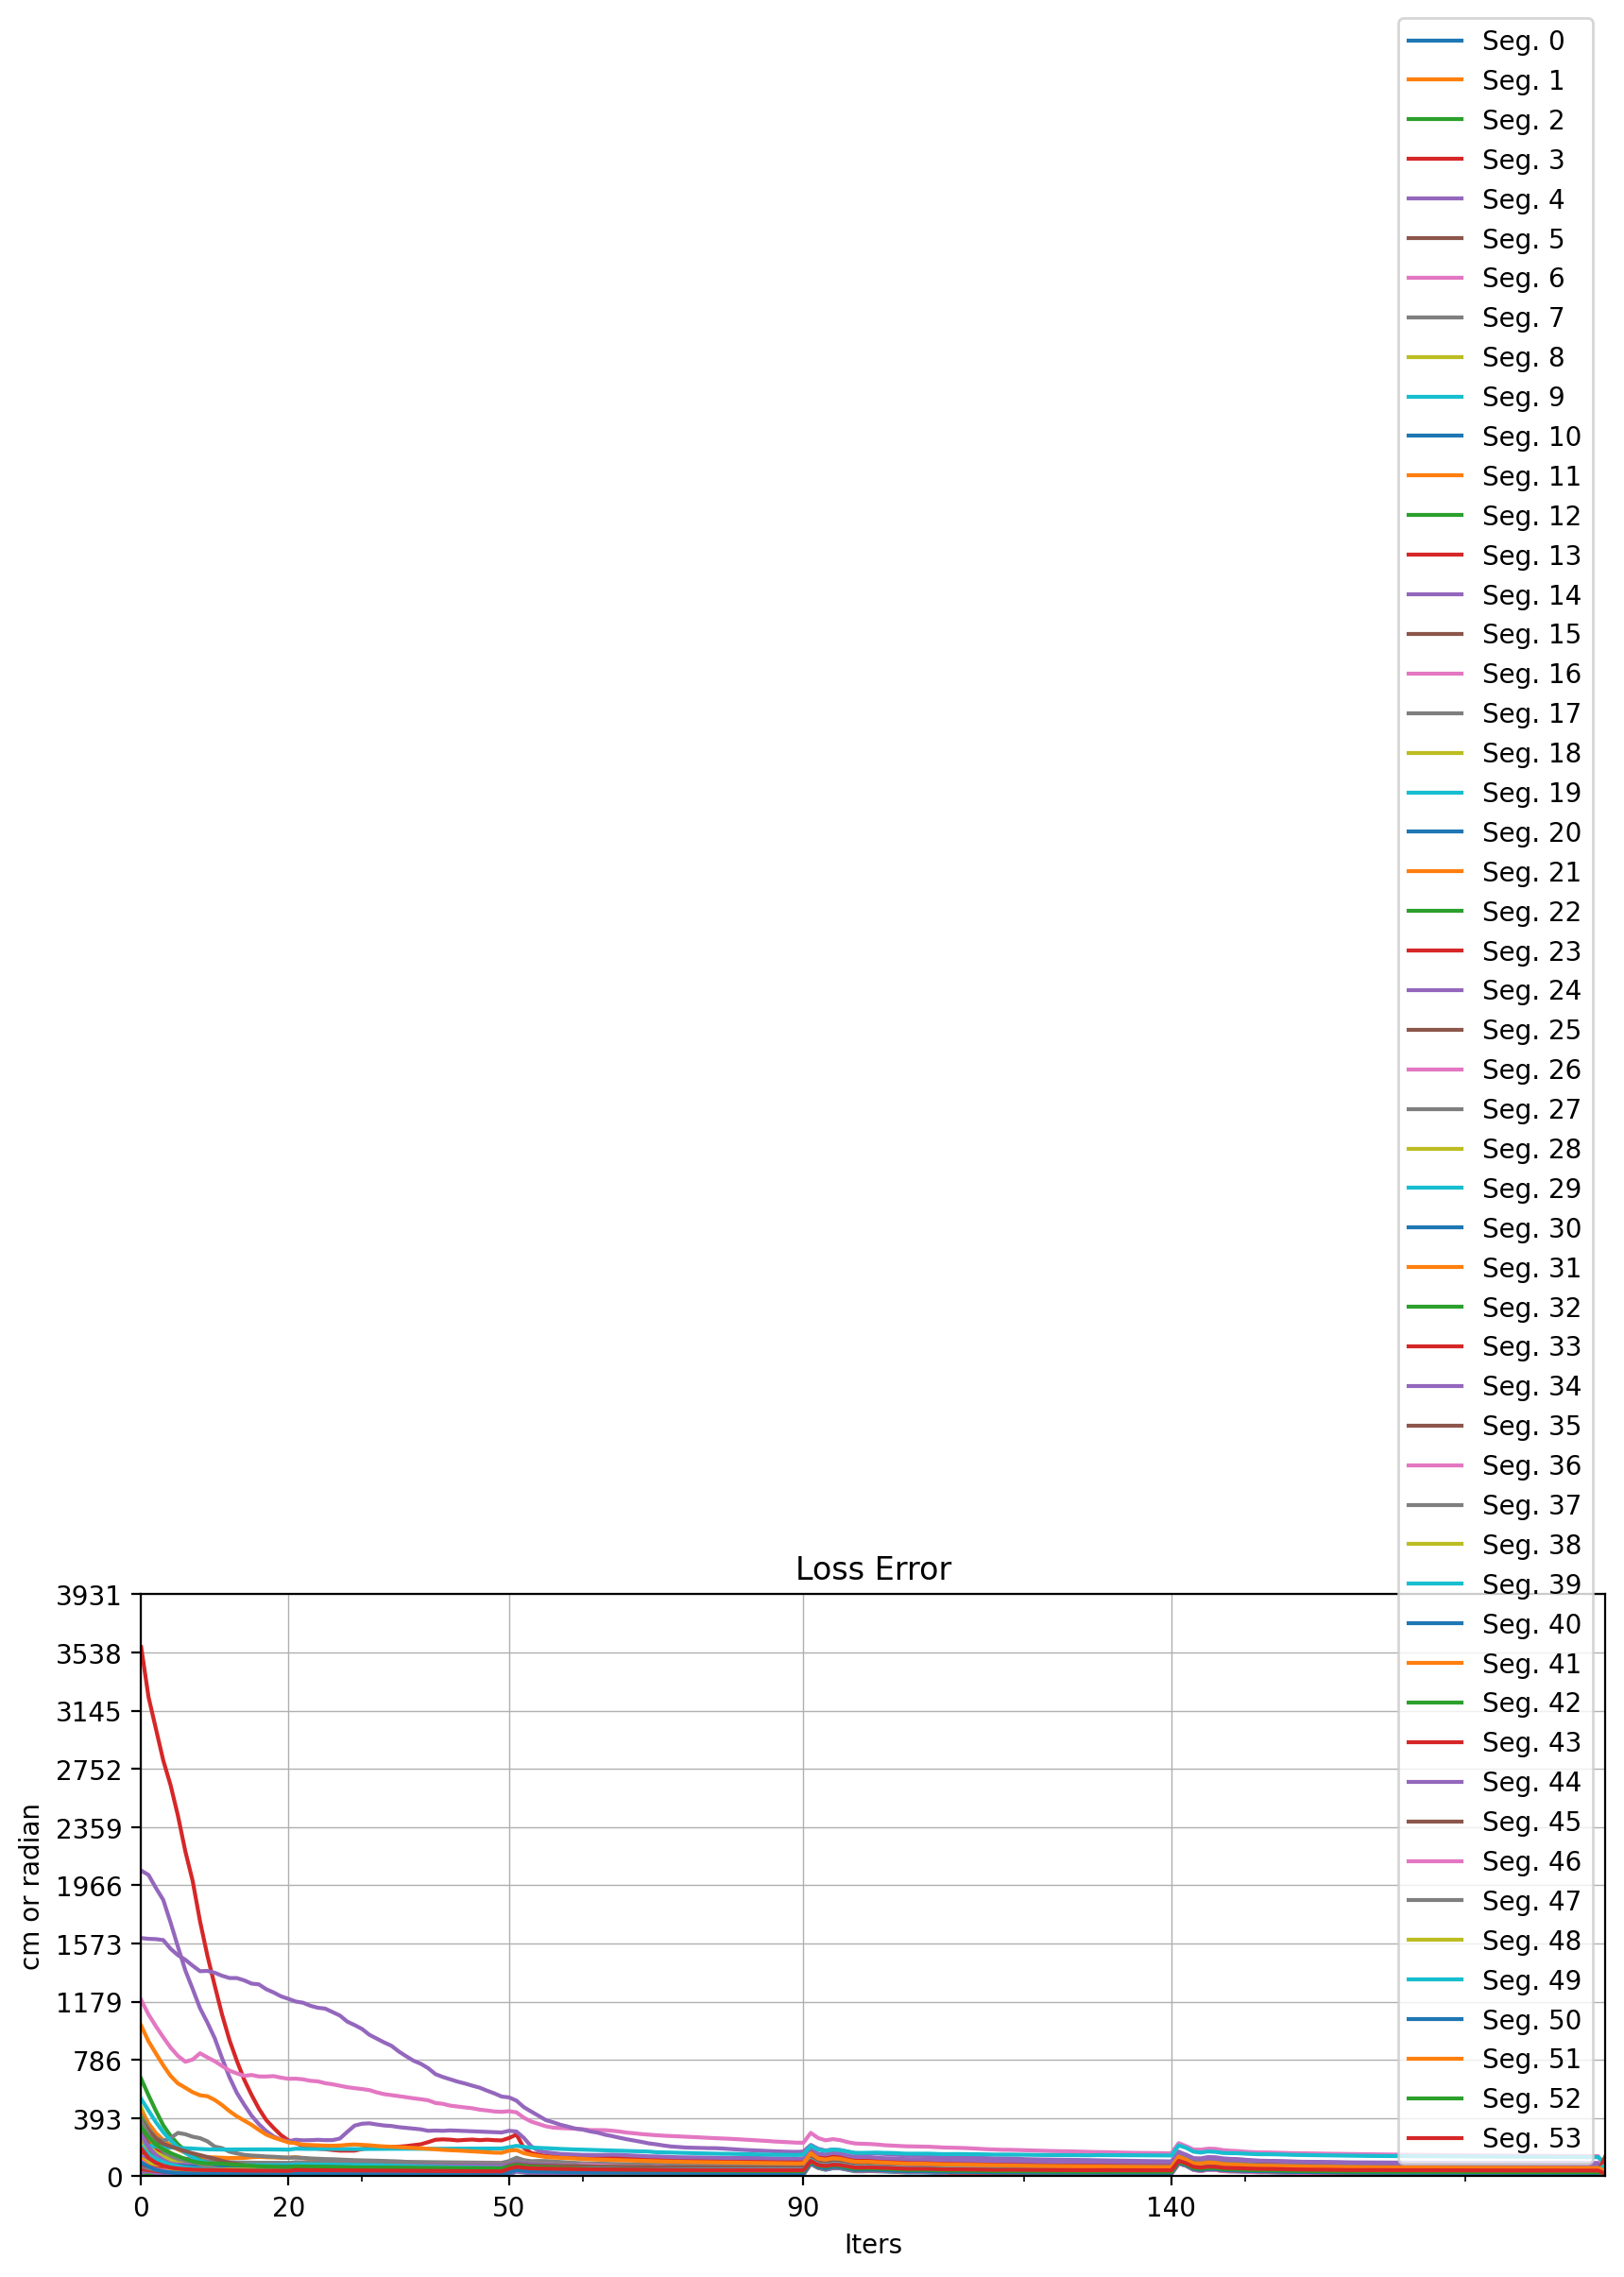

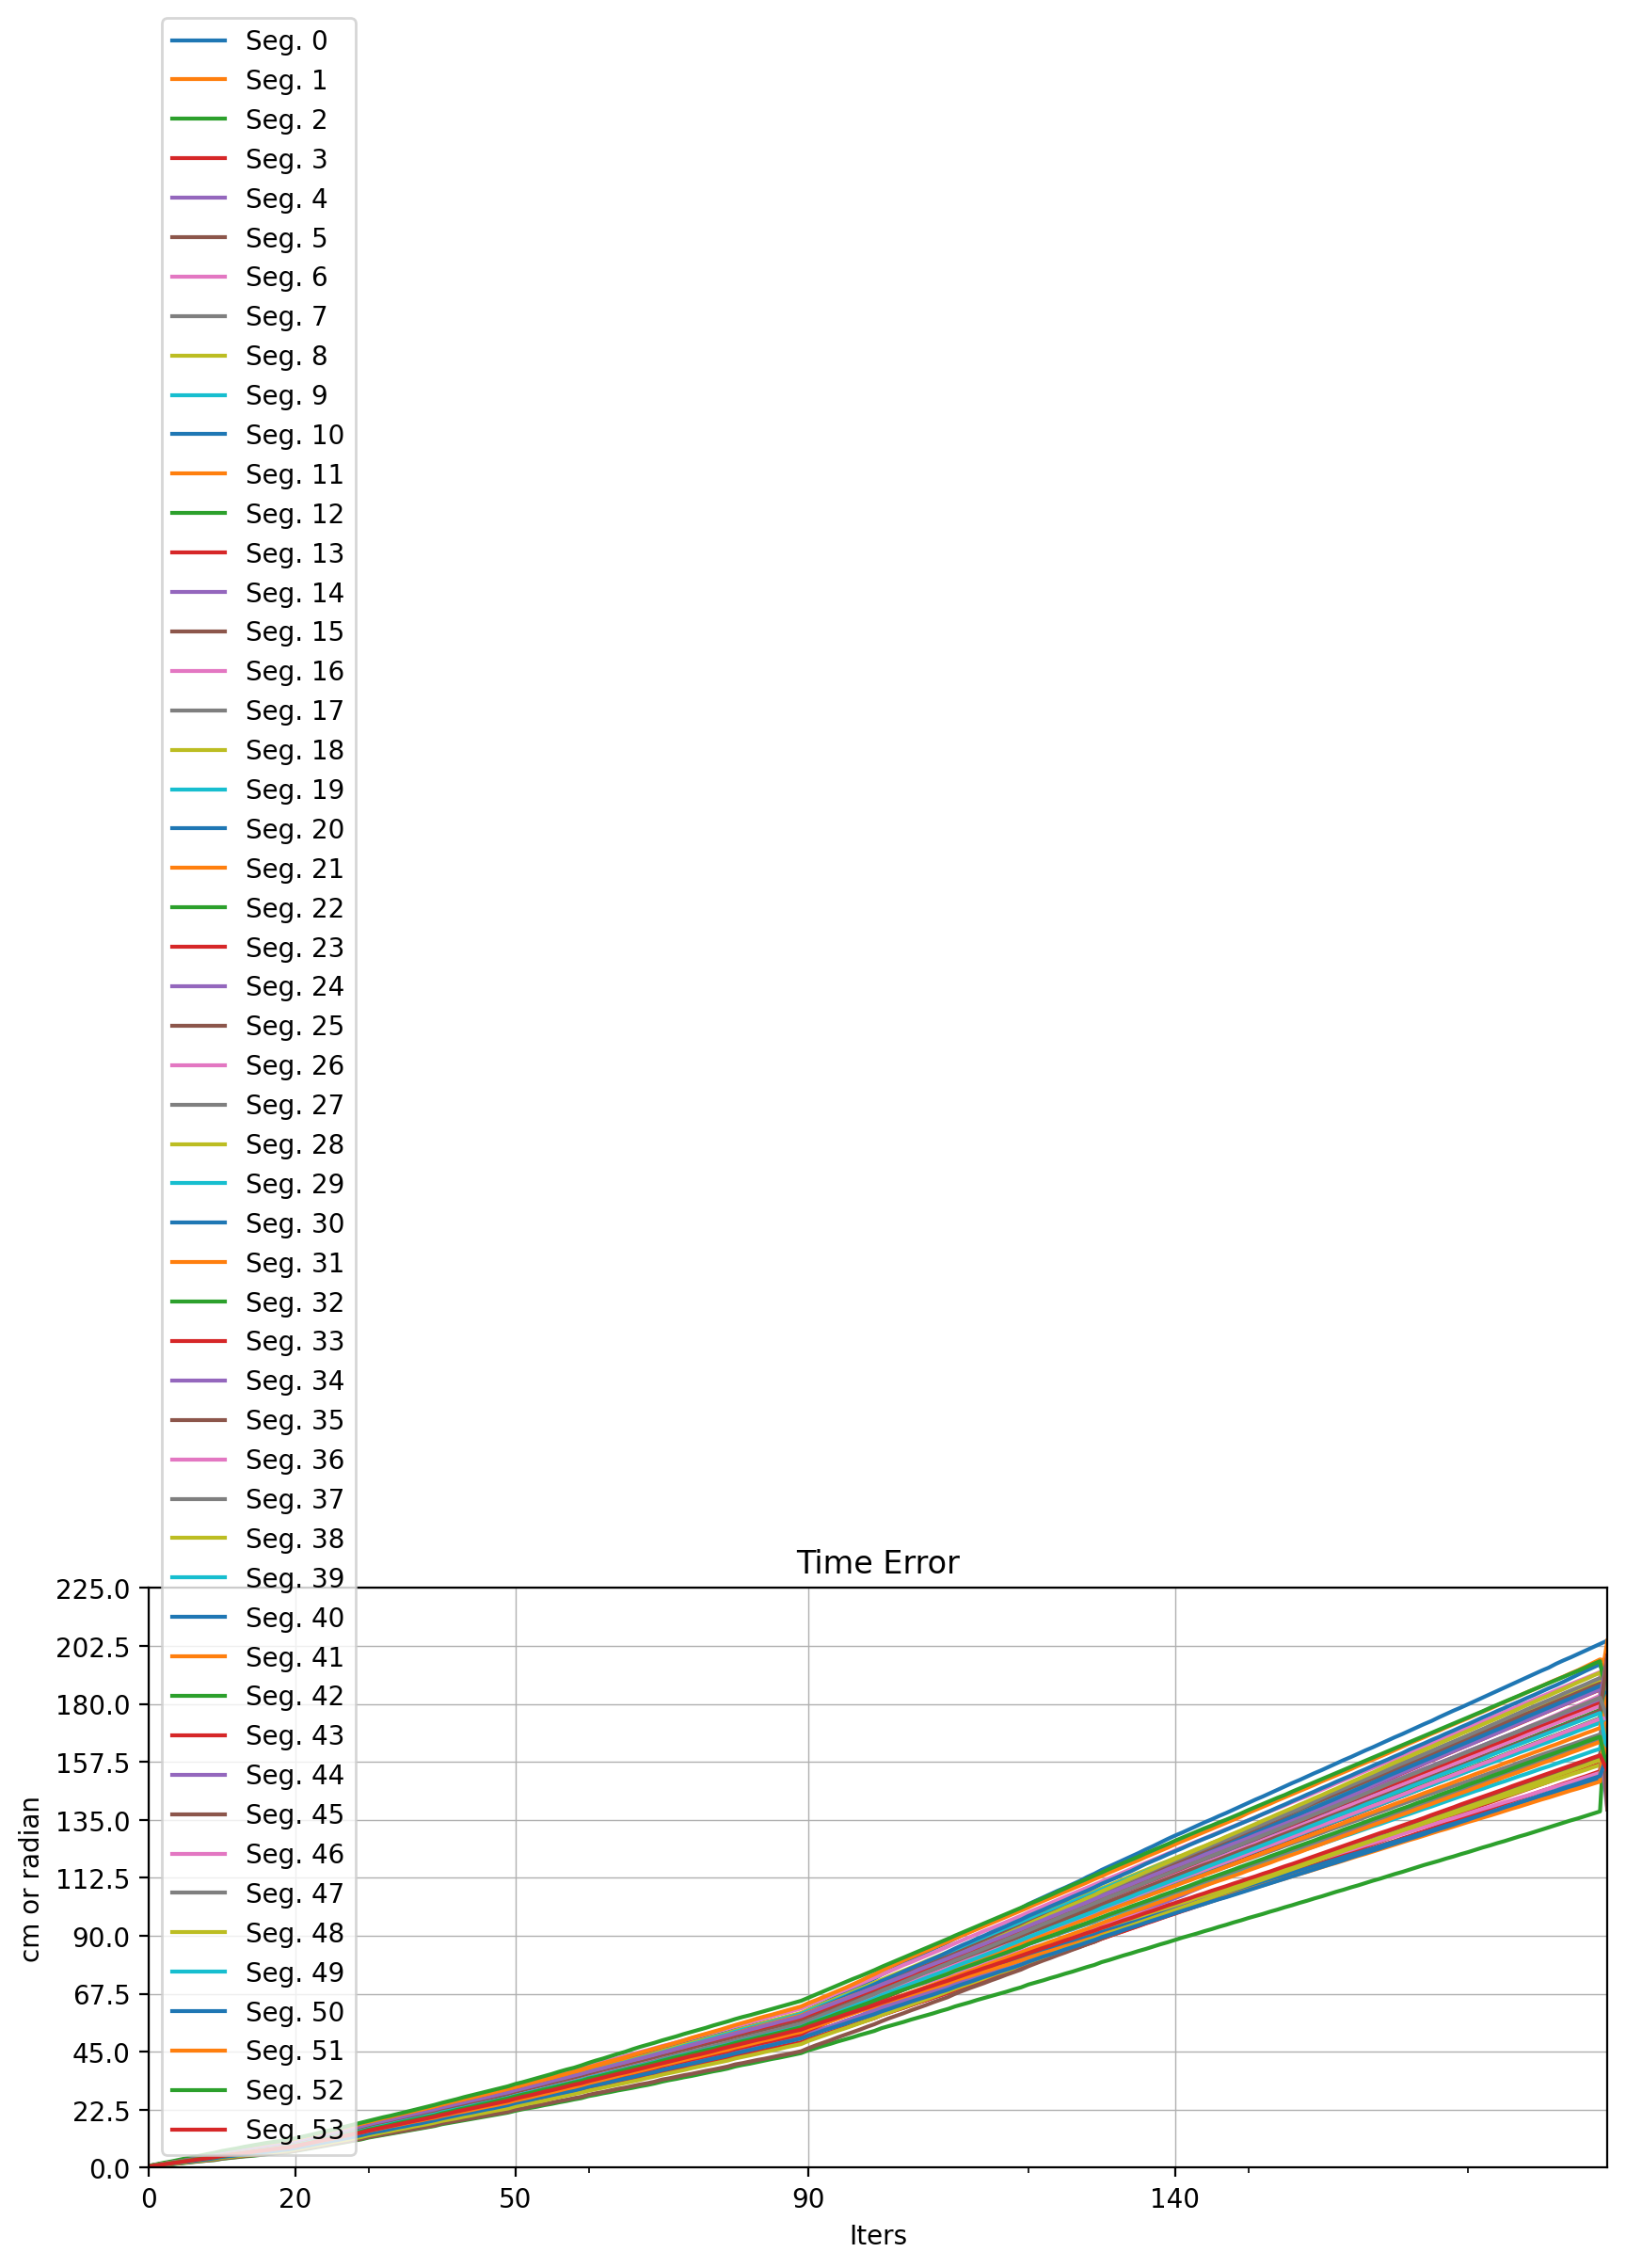

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import re
import numpy as np

plt.rcParams['figure.figsize'] = [10, 4]

def extract_numbers(filename, start_line, end_line, search_string):
    # numbers = []
    iters_indices = {}
    current_row = start_line - 1  # start from zero-based index
    
    with open(filename) as f:
        for i, line in enumerate(f):
            line = re.sub(r'\[[^\]]*\]', '', line)
            if i >= start_line-1 and i < end_line:
                loss = re.search(search_string + r'\s*(\d+(?:\.\d+)?)\s*', line)
                if loss:
                    try:
                        iters = int(line.split()[0])
                    except ValueError:
                        print(f'Getting iters error: {line}')
                        continue
                    if iters not in iters_indices:
                        iters_indices[iters] = []
                        
                    iters_indices[iters].append(float(loss.group(1)))
                    # numbers.append(float(error.group(1)))
                    # iters_indices.append(iters)
                    current_row = iters
                else:
                    current_row += 1
    
    x_y = []

    # 获取每个 key 对应的 value 的长度
    value_lengths = [len(iters_indices[key]) for key in iters_indices]

    # 循环遍历每个 n 值
    for n in range(max(value_lengths)):
        x = []
        y = []
        for key in iters_indices:
            if n < len(iters_indices[key]):
                x.append(key)
                y.append(iters_indices[key][n])
        if len(x) > 5:
            x_y.append([x, y])

    return x_y

def plot_numbers(x_y, search_string):
    # 绘制折线图
    fig, ax = plt.subplots()

    # 绘制每条线
    minx = 100000
    maxx = -20000
    miny = 100000
    maxy = -20000
    for i in range(len(x_y)):
        x, y = x_y[i]
        ax.plot(x, y, label=f"Seg. {i}")
        minx = min(x) if min(x) < minx else minx
        maxx = max(x) if max(x) > maxx else maxx
        miny = min(y) if min(y) < miny else miny
        maxy = max(y) if max(y) > maxy else maxy

    # 设置x轴的取值范围
    ax.set_xlim([minx, maxx])

    
    # 动态调整y轴的取值范围和刻度
    min_number = miny
    max_number = maxy
    if min_number == max_number:
        y_min = min_number - 0.5
        y_max = max_number + 0.5
    else:
        range_number = max_number - min_number
        y_min = min_number - 0.1 * range_number
        y_max = max_number + 0.1 * range_number
    y_min = max(0, y_min)
    y_ticks = [round(y_min + i * (y_max - y_min) / 10, 2) for i in range(11)]
    ax.set_ylim([max(0, y_min), y_max])
    ax.set_yticks(y_ticks)

    # x_ticks = np.arange(int(minx/10), int(maxx/10), 3)
    # ax.set_xticks(x_ticks*10)
    ax.set_xticks([0, 20, 50, 90, 140])
    # ax.grid(True, linestyle='--', linewidth=0.5)
    ax.grid(True, which='major', linestyle='-', linewidth=0.5)
    # ax.grid(True, which='major', linestyle='--', linewidth=1, alpha=0.5)

    ax.xaxis.set_minor_locator(plt.MultipleLocator(30))

    # 设置x和y轴的标签和标题
    ax.set_xlabel('Iters')
    ax.set_ylabel('cm or radian')
    ax.set_title(f'{search_string} Error')
    # 显示图形
    plt.legend()
    plt.show()

def plot_error(loss_type, start_line=1, end_line=100000):
    x_y = extract_numbers(filename, start_line, end_line, loss_type) # 查找以 "error_type" 开头的字符串后面的数字
    plot_numbers(x_y, loss_type)

filename = '/home/guest/Documents/Nymeria/20231222_s1_kenneth_fischer_act7_56uvqd/log/2025-01-24T18:04:02__wandb.log'


plot_error('cont')
plot_error('coll')
plot_error('pen')
# plot_error('m2p')
# plot_error('p2m')
plot_error(' sld')
plot_error('csld')
plot_error(' rot')
plot_error('crot')
plot_error(' trans')
plot_error('ctrans')
plot_error(' jts')
plot_error('cjts')
plot_error('prior')
plot_error(' pose')
plot_error('cpose')
plot_error('Loss')
plot_error('Time')